<a href="https://colab.research.google.com/github/ChinarVyas/Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raw data:- PC01_A01 for 2001 and
	   A-1_ raw2011 as raw data for 2011 both have area, population gender wise.

Formated data: 2001 /2011census cleaned.

https://censusindia.gov.in/census.website/data/census-tables

Link for the same. will have to update the details as
need to work on Literacy rate for each state.

Link for PDF that has litracy statewise.
https://mospi.gov.in/sites/default/files/reports_and_publication/statistical_publication/social_statistics/WM16Chapter3.pdf

litracy % 2011 cross verified from
https://www.mapsofindia.com/census2011/literacy-rate.html

**************
****************

to calculate the polulation for each year I have considered a simple formulae of compound annual growth.
Start Year* (1 + 0.0025) ^ (End Year- Start year).
where 0.0025 is considered the rate at which the population increases each year.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

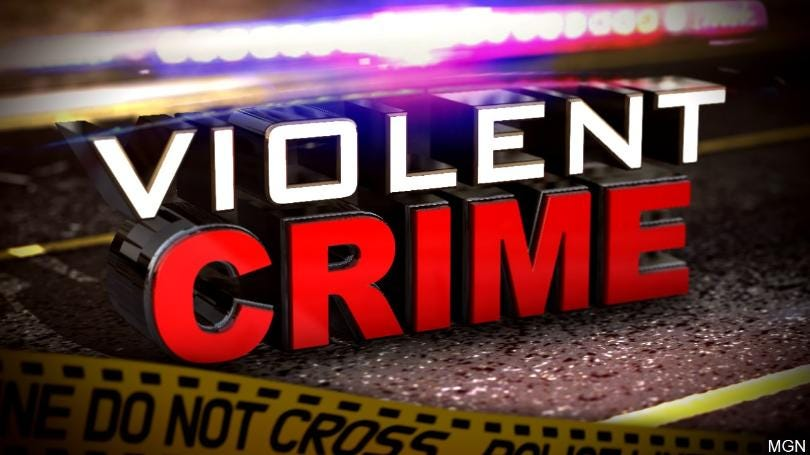

In [2]:
# @title
from PIL import Image
img = Image.open(r'/content/drive/MyDrive/Data Analysis/Data/final project/CrimeReport.jpg')
display(img)

In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/combined.csv',index_col="Sr number")

In [4]:
from IPython.display import display
with pd.option_context('display.max_columns', 100):
    display(df)  # Replace 'df' with your DataFrame


,States/ UT,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,TM_01,TM_02,TM_03,TM_04,TM_05,TM_06,TM_07,TM_08,TM_09,TM_10,TM_11,TF_01,TF_02,TF_03,TF_04,TF_05,TF_06,TF_07,TF_08,TF_09,TF_10,TF_11,TA_01,TA_11,LR_01,LR_11,LR_M01,LR_M11,LR_F01,LR_F11
Sr number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Andhra Pradesh,76210007,81925758,82130572,82335898,82541738,82748092,82954963,83162350,83370256,83578682,83787628,38527413,41416969,41520511,41624313,41728373,41832694,41937276,42042119,42147225,42252593,42358224,37682594,40508789,40610061,40914636,41221496,41530657,41842137,42155953,42472123,42790663,43111593,275045,275045,0.61,0.67,0.66,0.70,0.42,0.50
2,Arunachal Pradesh,1097968,1180316,1183266,1186225,1189190,1192163,1195143,1198131,1201127,1204130,1207140,579941,623437,624995,626558,628124,629694,631269,632847,634429,636015,637605,518027,556879,558271,562458,566677,570927,575209,579523,583869,588248,592660,83743,83743,0.54,0.65,0.86,0.64,0.68,0.44
3,Assam,26655528,28654693,28726329,28798145,28870141,28942316,29014672,29087208,29159926,29232826,29305908,13777037,14810315,14847341,14884459,14921670,14958974,14996372,15033863,15071447,15109126,15146899,12878491,13844378,13878989,13983081,14087954,14193614,14300066,14407317,14515371,14624237,14733918,78438,78438,0.63,0.73,0.76,0.79,0.64,0.67
4,Bihar,82998509,89223397,89446456,89670072,89894247,90118983,90344280,90570141,90796566,91023558,91251116,43243795,46487080,46603297,46719806,46836605,46953697,47071081,47188759,47306730,47424997,47543560,39754714,42736318,42843158,43164482,43488216,43814377,44142985,44474057,44807613,45143670,45482248,94163,94163,0.47,0.64,0.86,0.74,0.77,0.53
5,Chhattisgarh,20833803,22396338,22452329,22508460,22564731,22621143,22677696,22734390,22791226,22848204,22905325,10474218,11259784,11287934,11316154,11344444,11372805,11401237,11429740,11458315,11486960,11515678,10359585,11136554,11164395,11248128,11332489,11417483,11503114,11589387,11676308,11763880,11852109,135191,135192,0.82,0.71,0.79,0.82,0.56,0.61
6,Goa,1347668,1448743,1452365,1455996,1459636,1463285,1466943,1470611,1474287,1477973,1481668,687248,738792,740639,742490,744346,746207,748073,749943,751818,753697,755582,660420,709952,711726,717064,722442,727861,733320,738819,744361,749943,755568,3702,3702,0.82,0.87,0.60,0.93,0.34,0.82
7,Gujarat,50671017,54471343,54607522,54744040,54880901,55018103,55155648,55293537,55431771,55570350,55709276,26385577,28364495,28435407,28506495,28577761,28649206,28720829,28792631,28864612,28936774,29009116,24285440,26106848,26172115,26368406,26566169,26765415,26966156,27168402,27372165,27577456,27784287,196024,196244,0.70,0.79,0.77,0.87,0.61,0.71
8,Haryana,21144564,22730406,22787232,22844200,22901311,22958564,23015961,23073500,23131184,23189012,23246985,11363953,12216249,12246790,12277407,12308101,12338871,12369718,12400642,12431644,12462723,12493880,9780611,10514157,10540442,10619496,10699142,10779385,10860231,10941682,11023745,11106423,11189721,44212,44212,0.68,0.77,0.64,0.85,0.44,0.67
9,Himanchal Pradesh,6077900,6533743,6550077,6566452,6582868,6599325,6615824,6632363,6648944,6665566,6682230,3087940,3319536,3327834,3336154,3344494,3352856,3361238,3369641,3378065,3386510,3394976,2989960,3214207,3222243,3246409,3270757,3295288,3320003,3344903,3369990,3395264,3420729,55673,55673,0.77,0.84,0.72,0.91,0.62,0.77


In [5]:
df.columns

Index(['States/ UT', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', 'TM_01', 'TM_02', 'TM_03', 'TM_04',
       'TM_05', 'TM_06', 'TM_07', 'TM_08', 'TM_09', 'TM_10', 'TM_11', 'TF_01',
       'TF_02', 'TF_03', 'TF_04', 'TF_05', 'TF_06', 'TF_07', 'TF_08', 'TF_09',
       'TF_10', 'TF_11', 'TA_01', 'TA_11', 'LR_01', 'LR_11', 'LR_M01',
       'LR_M11', 'LR_F01', 'LR_F11'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 37
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   States/ UT  37 non-null     object 
 1   2001        37 non-null     int64  
 2   2002        37 non-null     int64  
 3   2003        37 non-null     int64  
 4   2004        37 non-null     int64  
 5   2005        37 non-null     int64  
 6   2006        37 non-null     int64  
 7   2007        37 non-null     int64  
 8   2008        37 non-null     int64  
 9   2009        37 non-null     int64  
 10  2010        37 non-null     int64  
 11  2011        37 non-null     int64  
 12  TM_01       37 non-null     int64  
 13  TM_02       37 non-null     int64  
 14  TM_03       37 non-null     int64  
 15  TM_04       37 non-null     int64  
 16  TM_05       37 non-null     int64  
 17  TM_06       37 non-null     int64  
 18  TM_07       37 non-null     int64  
 19  TM_08       37 non-null     int

The columns that have TM are the total males, one with TF is total females, LR is learning rate and TA is the total area as per the states.
I had received the data for population for the govt sites for 2001 and 2011


*  I realised that the population growth is in the range of 0.020 to 0.030 so have considered 0.025 to obtain realistic numbers. compared the available number on the site for 2011 and they happen to be in close proximity.  
*   Area for the states remains the same for each year.
*   Litracy rate also remains on slow increase as the year pass. will move on with the phase 2 reviewing some of the details mentioned on the file and my observations




**Phase 2
State/UT wise analysis.

Note :


You need to be careful as this phase is whole state/ut wise analysis (not district-wise).

It is up to you which columns you want to keep or delete to make proper analysis"

2.1	Analysis of Literacy Rate vs Total Crimes.

2.2	 Analysis of the type of crime vs each state vs Literacy rate.

2.3	Analysis of year-on-year total crime rate.

2.4	 Analysis of area vs overall crime

2.5	 Analysis of Population vs overall Crime


2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.**

In [7]:
df1=pd.read_excel(r'/content/drive/MyDrive/Data Analysis/Data/statewise crime committed.xlsx')

In [8]:
df1

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,2001,2602,1555,136,871,1182,214,9,629,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
1,ARUNACHAL PRADESH,2001,83,53,3,33,83,22,2,84,...,13,466,0,78,3,11,0,0,618,2342
2,ASSAM,2001,1356,481,40,817,1480,532,14,687,...,441,5805,59,850,4,1248,0,2010,9315,36877
3,BIHAR,2001,3643,3419,250,888,2159,1291,147,2203,...,502,7544,859,562,21,1558,83,2406,36667,88432
4,CHHATTISGARH,2001,880,529,45,959,207,87,19,338,...,215,5477,70,1763,161,840,0,689,15790,38460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,21,44,5,27,87,3,9,63,...,9,42,5,45,25,73,0,3,1042,3606
404,D & N HAVELI,2012,7,2,0,3,13,2,0,2,...,12,25,0,2,0,0,0,23,112,318
405,DAMAN & DIU,2012,3,5,0,5,3,1,0,3,...,11,17,0,0,0,3,0,38,46,239
406,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60


In [9]:
df1.columns

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [10]:
df1.columns = df1.columns.str.lower()

In [11]:
df1

,state/ut,year,murder,attempt to murder,culpable homicide not amounting to murder,rape,kidnapping & abduction,dacoity,preparation and assembly for dacoity,robbery,...,arson,hurt/grevious hurt,dowry deaths,assault on women with intent to outrage her modesty,insult to modesty of women,cruelty by husband or his relatives,importation of girls from foreign countries,causing death by negligence,other ipc crimes,total ipc crimes
0,ANDHRA PRADESH,2001,2602,1555,136,871,1182,214,9,629,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
1,ARUNACHAL PRADESH,2001,83,53,3,33,83,22,2,84,...,13,466,0,78,3,11,0,0,618,2342
2,ASSAM,2001,1356,481,40,817,1480,532,14,687,...,441,5805,59,850,4,1248,0,2010,9315,36877
3,BIHAR,2001,3643,3419,250,888,2159,1291,147,2203,...,502,7544,859,562,21,1558,83,2406,36667,88432
4,CHHATTISGARH,2001,880,529,45,959,207,87,19,338,...,215,5477,70,1763,161,840,0,689,15790,38460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,21,44,5,27,87,3,9,63,...,9,42,5,45,25,73,0,3,1042,3606
404,D & N HAVELI,2012,7,2,0,3,13,2,0,2,...,12,25,0,2,0,0,0,23,112,318
405,DAMAN & DIU,2012,3,5,0,5,3,1,0,3,...,11,17,0,0,0,3,0,38,46,239
406,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60


In [12]:
grouped = df1.groupby(['year', 'state/ut'])['total ipc crimes'].sum().reset_index()

**2.3 Analysis of year-on-year total crime rate.**
====

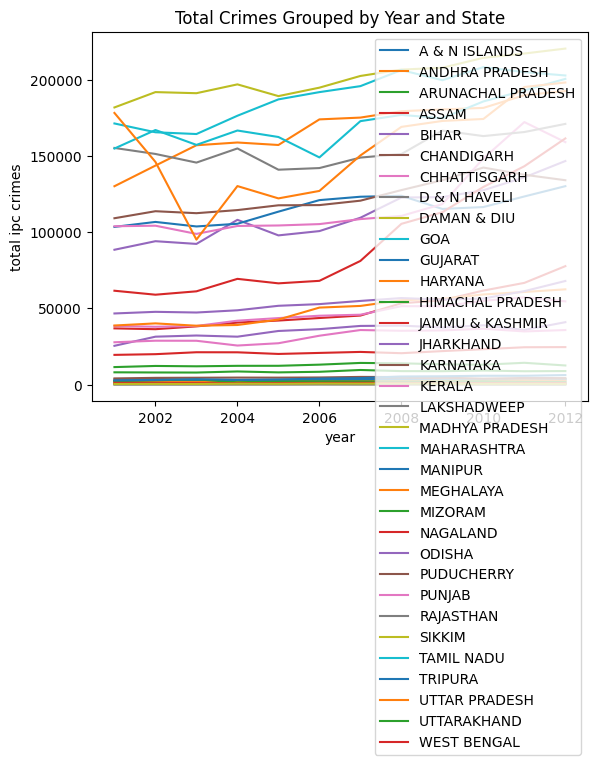

In [13]:
for state in grouped['state/ut'].unique():
    state_data = grouped[grouped['state/ut'] == state]
    plt.plot(state_data['year'], state_data['total ipc crimes'], label=state)


plt.xlabel('year')
plt.ylabel('total ipc crimes')
plt.title('Total Crimes Grouped by Year and State')
plt.legend()
plt.show()



1.   For better visuals and easy of understanding the graphs dividing the states in 3 different groups. will work on plotting the statewise and yearwise graphs to understand the trends.




In [14]:
state_group1 = ["ANDHRA PRADESH","UTTAR PRADESH","ODISHA","PUNJAB","RAJASTHAN","SIKKIM","TAMIL NADU","TRIPURA","UTTARAKHAND","ARUNACHAL PRADESH","WEST BENGAL"]
state_group2 = ["A & N ISLANDS","CHANDIGARH","D & N HAVELI","DAMAN & DIU","LAKSHADWEEP","NAGALAND","MIZORAM","MEGHALAYA","MANIPUR","MAHARASHTRA","MADHYA PRADESH"]
state_group3 = ["KERALA","KARNATAKA","JHARKHAND","JAMMU & KASHMIR","HIMACHAL PRADESH","HARYANA","GUJARAT","GOA","CHHATTISGARH","BIHAR","ASSAM","PUDUCHERRY"]

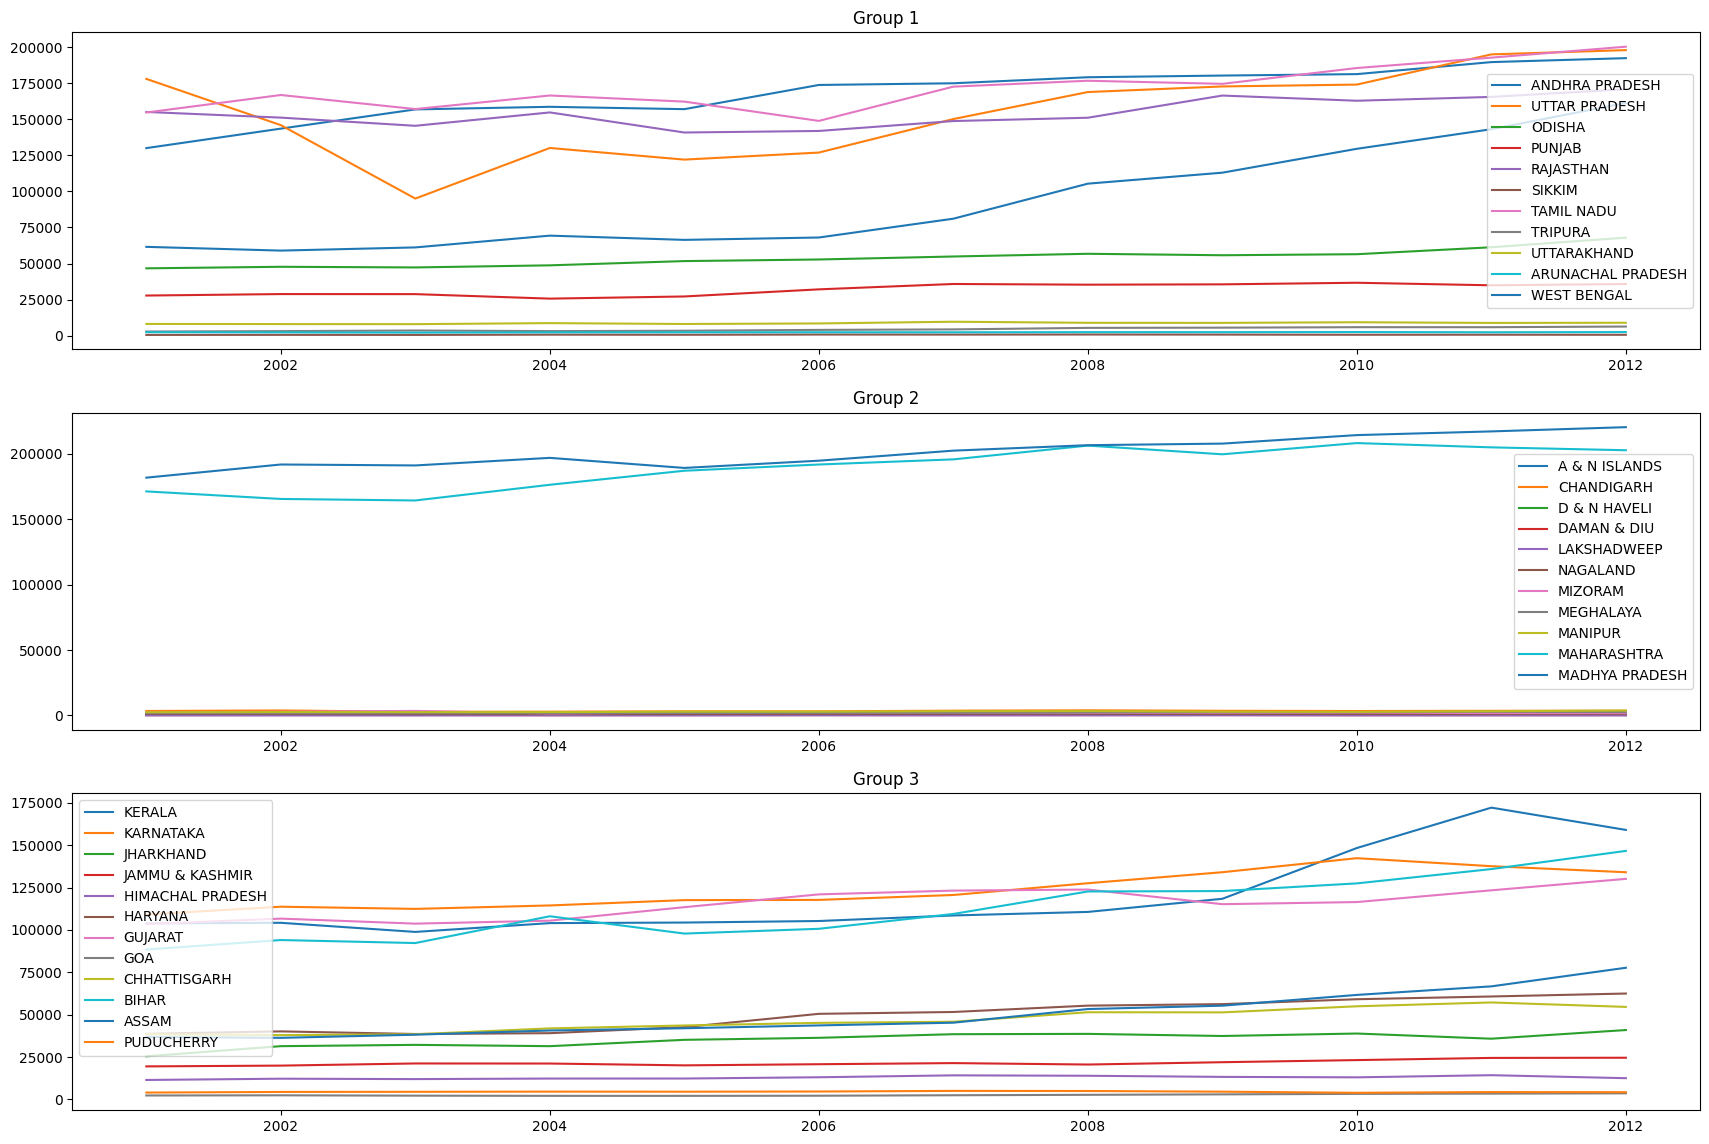

In [15]:
fig, axs = plt.subplots(3, figsize=(21,14))
for state in state_group1:
    state_data = grouped[grouped['state/ut'] == state]
    axs[0].plot(state_data['year'], state_data['total ipc crimes'], label=state)
axs[0].set_title('Group 1')
axs[0].legend();

for state in state_group2:
    state_data = grouped[grouped['state/ut'] == state]
    axs[1].plot(state_data['year'], state_data['total ipc crimes'], label=state)
axs[1].set_title('Group 2')
axs[1].legend();

for state in state_group3:
    state_data = grouped[grouped['state/ut'] == state]
    axs[2].plot(state_data['year'], state_data['total ipc crimes'], label=state)
axs[2].set_title('Group 3')
axs[2].legend();

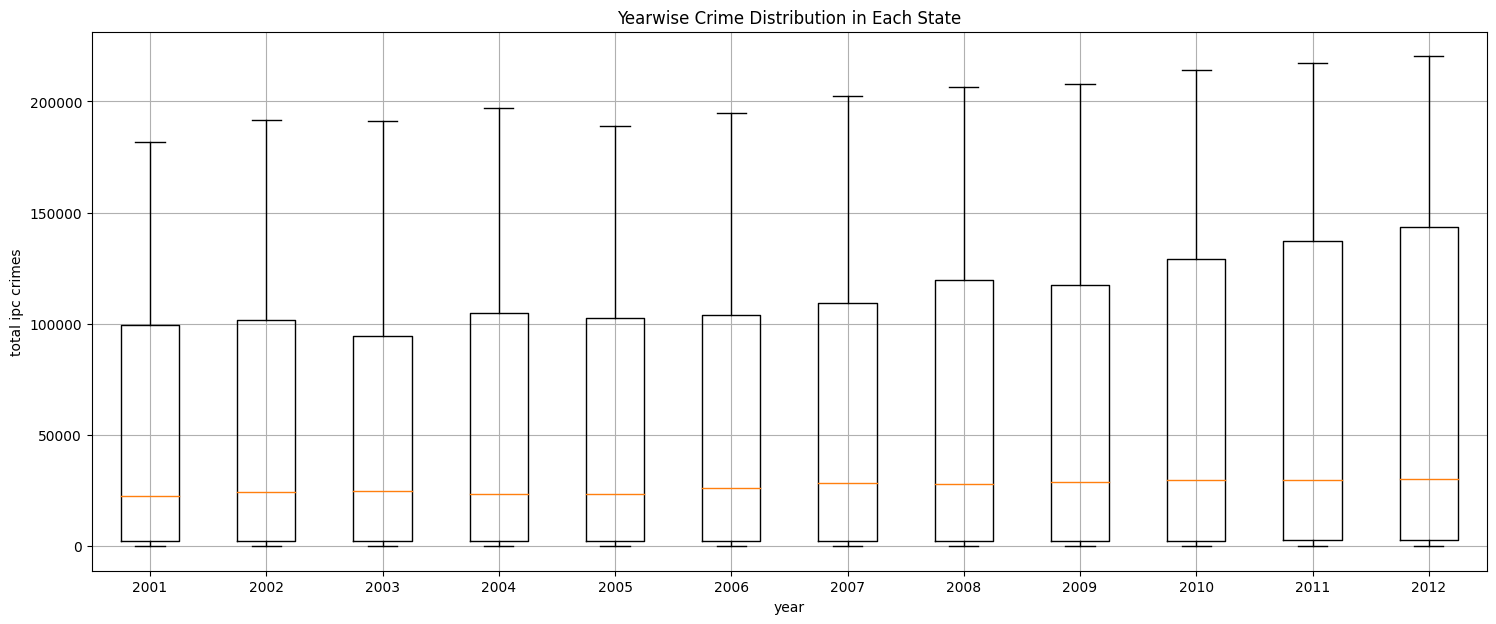

In [16]:
plt.figure(figsize=(18, 7))
plt.boxplot([df1[df1["year"] == year]["total ipc crimes"] for year in df1["year"].unique()],
            labels=df1["year"].unique())
plt.xlabel("year")
plt.ylabel("total ipc crimes")
plt.title("Yearwise Crime Distribution in Each State")
plt.grid(True)
plt.show()



1.   Through statewise and yearwise it is evident that the crimes have increased over the period of time. there are some state that have more impact where there are some that have moderate.
2.   There are some states that show stable administration and better law abiding citizens with minimal crime rates or on the other hand it is also possibe that the people are not voicing their concern against the crimes and reporting them due to some menace or administration.



In [17]:
df3=pd.read_excel(r'/content/drive/MyDrive/Data Analysis/Data/combined...xlsx')

In [18]:
df3

,Unnamed: 0,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,...,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Population,Males,Females,Learning_rate,Area (Sq_m)
0,1,ANDHRA PRADESH,2001,2602,1555,136,871,1182,214,9,...,5791,7,7400,34344,130089,7.621001e+07,3.852741e+07,3.768259e+07,0.610000,275045
1,2,ARUNACHAL PRADESH,2001,83,53,3,33,83,22,2,...,11,0,0,618,2342,1.097968e+06,5.799410e+05,5.180270e+05,0.540000,83743
2,3,ASSAM,2001,1356,481,40,817,1480,532,14,...,1248,0,2010,9315,36877,2.665553e+07,1.377704e+07,1.287849e+07,0.630000,78438
3,4,BIHAR,2001,3643,3419,250,888,2159,1291,147,...,1558,83,2406,36667,88432,8.299851e+07,4.324380e+07,3.975471e+07,0.470000,94163
4,5,CHHATTISGARH,2001,880,529,45,959,207,87,19,...,840,0,689,15790,38460,2.083380e+07,1.047422e+07,1.035958e+07,0.820000,135192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,29,CHANDIGARH,2012,21,44,5,27,87,3,9,...,73,0,3,1042,3606,1.015823e+06,5.618017e+05,4.540213e+05,0.959054,114
404,30,D & N HAVELI,2012,7,2,0,3,13,2,0,...,0,0,23,112,318,2.487996e+05,1.348331e+05,1.139665e+05,0.701747,491
405,31,DAMAN & DIU,2012,3,5,0,5,3,1,0,...,3,0,38,46,239,1.782819e+05,1.025247e+05,7.575725e+04,0.947358,111
406,35,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,1,0,0,32,60,6.854198e+04,3.449981e+04,3.404218e+04,0.947358,30


In [19]:
df3.columns = df3.columns.str.lower()

In [20]:
df3.columns

Index(['unnamed: 0', 'state/ut', 'year', 'murder', 'attempt to murder',
       'culpable homicide not amounting to murder', 'rape',
       'kidnapping & abduction', 'dacoity',
       'preparation and assembly for dacoity', 'robbery', 'burglary', 'theft',
       'auto theft', 'other theft', 'riots', 'criminal breach of trust',
       'cheating', 'counterfieting', 'arson', 'hurt/grevious hurt',
       'dowry deaths', 'assault on women with intent to outrage her modesty',
       'insult to modesty of women', 'cruelty by husband or his relatives',
       'importation of girls from foreign countries',
       'causing death by negligence', 'other ipc crimes', 'total ipc crimes',
       'population', 'males', 'females', 'learning_rate ', 'area (sq_m)'],
      dtype='object')

In [21]:
details=df3[['state/ut','year','other ipc crimes','total ipc crimes','population','males','females','learning_rate ','area (sq_m)' ]]

In [22]:
details

,state/ut,year,other ipc crimes,total ipc crimes,population,males,females,learning_rate,area (sq_m)
0,ANDHRA PRADESH,2001,34344,130089,7.621001e+07,3.852741e+07,3.768259e+07,0.610000,275045
1,ARUNACHAL PRADESH,2001,618,2342,1.097968e+06,5.799410e+05,5.180270e+05,0.540000,83743
2,ASSAM,2001,9315,36877,2.665553e+07,1.377704e+07,1.287849e+07,0.630000,78438
3,BIHAR,2001,36667,88432,8.299851e+07,4.324380e+07,3.975471e+07,0.470000,94163
4,CHHATTISGARH,2001,15790,38460,2.083380e+07,1.047422e+07,1.035958e+07,0.820000,135192
...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,1042,3606,1.015823e+06,5.618017e+05,4.540213e+05,0.959054,114
404,D & N HAVELI,2012,112,318,2.487996e+05,1.348331e+05,1.139665e+05,0.701747,491
405,DAMAN & DIU,2012,46,239,1.782819e+05,1.025247e+05,7.575725e+04,0.947358,111
406,LAKSHADWEEP,2012,32,60,6.854198e+04,3.449981e+04,3.404218e+04,0.947358,30


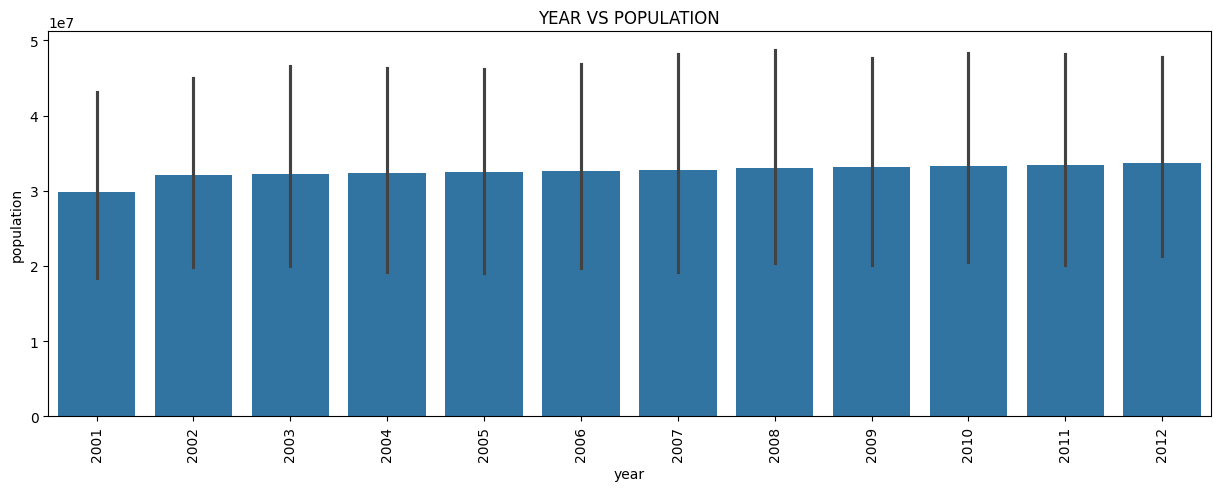

In [23]:
population_yearly = df3.groupby('year')['population'].sum()

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=df3['year'], y=df3['population'])
plt.xticks(rotation=90)
plt.title('YEAR VS POPULATION')
plt.show()

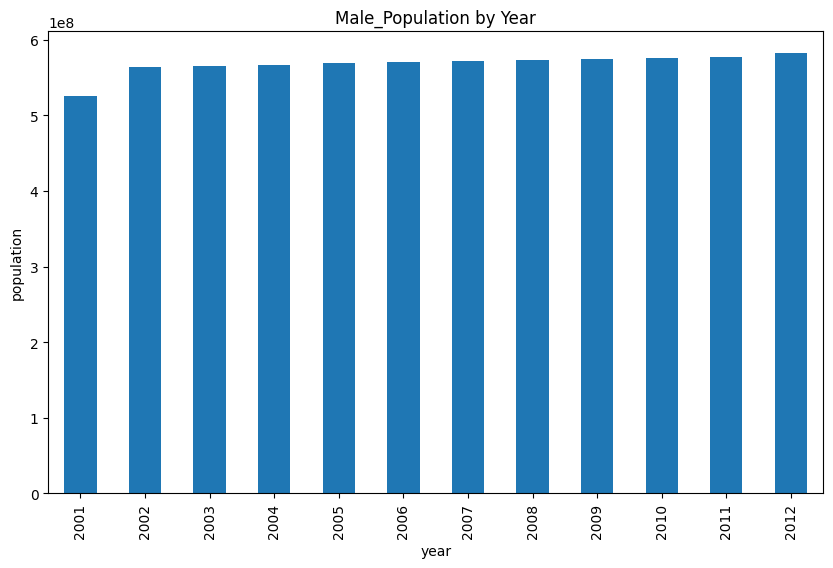

In [24]:
population_yearly_males = df3.groupby('year')['males'].sum()

# Plotting
plt.figure(figsize=(10,6))
population_yearly_males.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('population')
plt.title('Male_Population by Year')
plt.show();

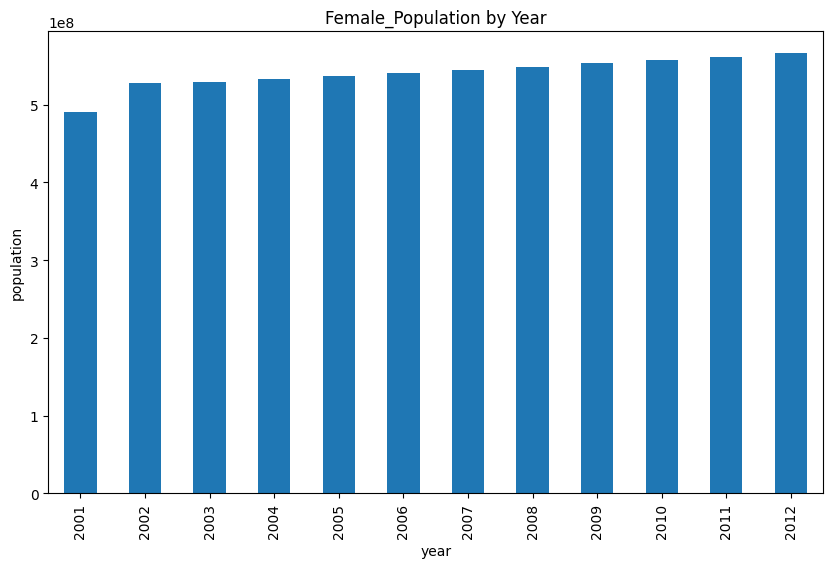

In [25]:
population_yearly_females = df3.groupby('year')['females'].sum()

# Plotting
plt.figure(figsize=(10,6))
population_yearly_females.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('population')
plt.title('Female_Population by Year')
plt.show();

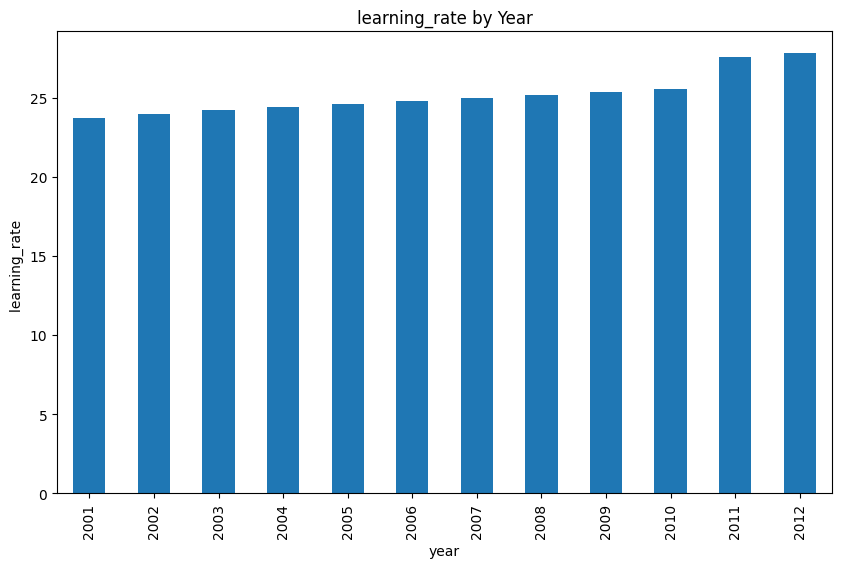

In [26]:
learning_rate = df3.groupby('year')['learning_rate '].sum()

# Plotting
plt.figure(figsize=(10,6))
learning_rate.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('learning_rate ')
plt.title('learning_rate by Year')
plt.show();

The graphs for population,Males, females and learning rate shows gradual improvement as the year on year increment I have considered is constant which will not be the actual case. hence the graphs look better as the year passes by


2.1 Analysis of Literacy Rate vs Total Crimes.
======

In [27]:
details

,state/ut,year,other ipc crimes,total ipc crimes,population,males,females,learning_rate,area (sq_m)
0,ANDHRA PRADESH,2001,34344,130089,7.621001e+07,3.852741e+07,3.768259e+07,0.610000,275045
1,ARUNACHAL PRADESH,2001,618,2342,1.097968e+06,5.799410e+05,5.180270e+05,0.540000,83743
2,ASSAM,2001,9315,36877,2.665553e+07,1.377704e+07,1.287849e+07,0.630000,78438
3,BIHAR,2001,36667,88432,8.299851e+07,4.324380e+07,3.975471e+07,0.470000,94163
4,CHHATTISGARH,2001,15790,38460,2.083380e+07,1.047422e+07,1.035958e+07,0.820000,135192
...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,1042,3606,1.015823e+06,5.618017e+05,4.540213e+05,0.959054,114
404,D & N HAVELI,2012,112,318,2.487996e+05,1.348331e+05,1.139665e+05,0.701747,491
405,DAMAN & DIU,2012,46,239,1.782819e+05,1.025247e+05,7.575725e+04,0.947358,111
406,LAKSHADWEEP,2012,32,60,6.854198e+04,3.449981e+04,3.404218e+04,0.947358,30


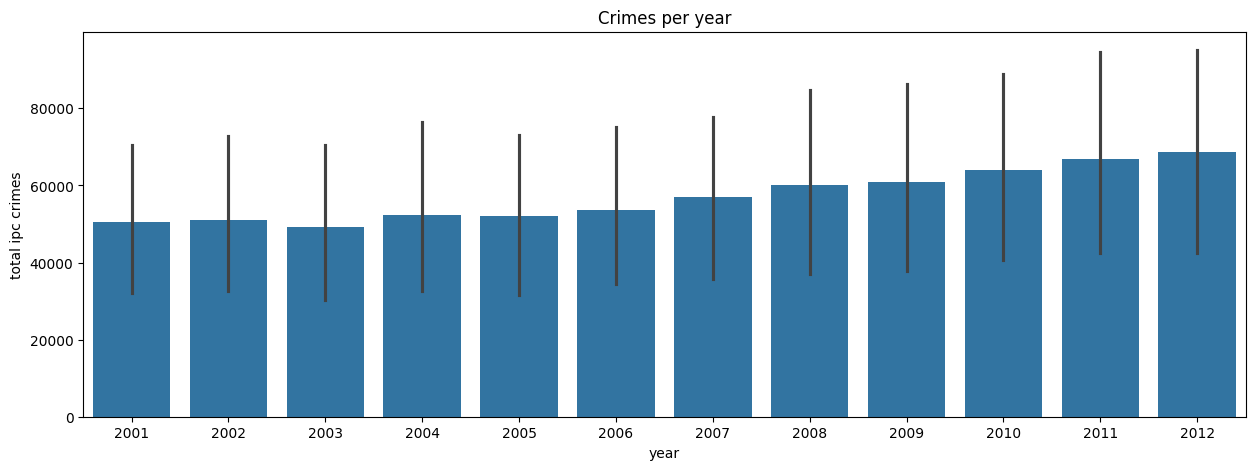

In [28]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df3['year'], y=df3['total ipc crimes'])
plt.title('Crimes per year')
plt.show()

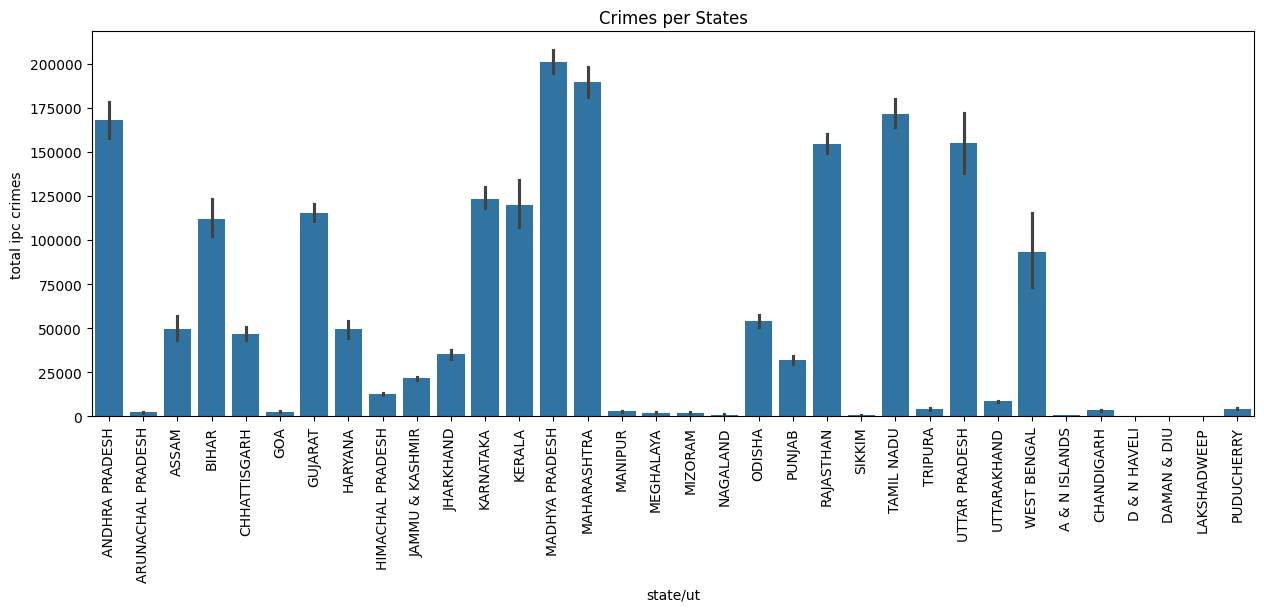

In [29]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df3['state/ut'], y=df3['total ipc crimes'])
plt.xticks(rotation=90)
plt.title('Crimes per States')
plt.show()

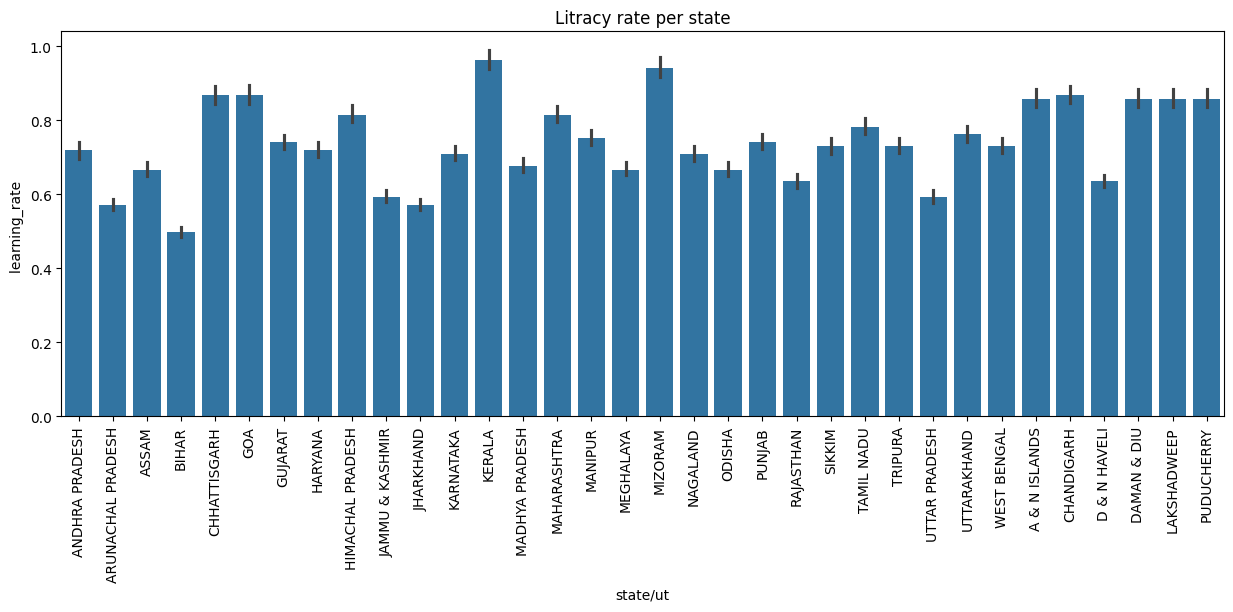

In [30]:
plt.figure(figsize=(15, 5))
sns.barplot(x='state/ut', y='learning_rate ',data=details)
plt.xticks(rotation=90)
plt.title('Litracy rate per state')
plt.show()

By the above graphic conclusion we can consider that Kerala has high literacy rate with lowest being in bihar.
we also oberve that crime seems to be very high in states:- MP, MH, and AP.
it is not related to the education.




*   2.2 Analysis of the type of crime vs each state vs Literacy rate.
*   2.4 Analysis of area vs overall crime

*   2.5 Analysis of Population vs overall Crime
*   2.6 Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.**

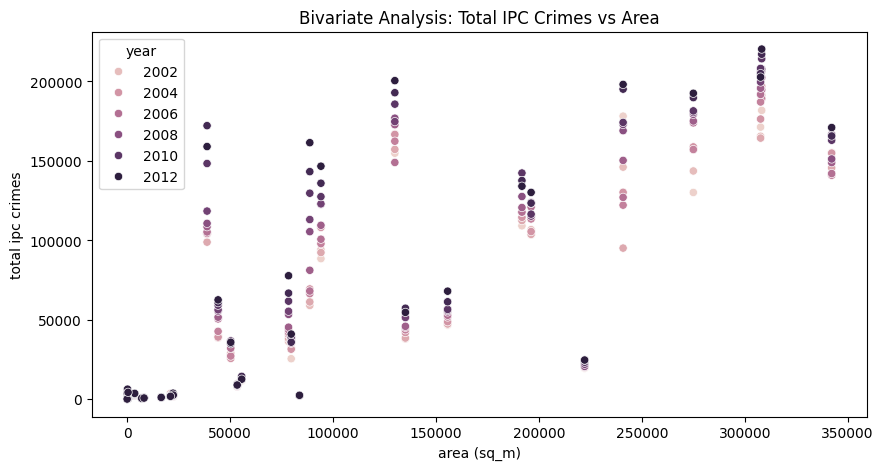

In [31]:
plt.figure(figsize=(10,5))

# Bivariate analysis with a scatterplot
sns.scatterplot(y='total ipc crimes', x='area (sq_m)',hue="year", data=details)

plt.title('Bivariate Analysis: Total IPC Crimes vs Area')
plt.show()

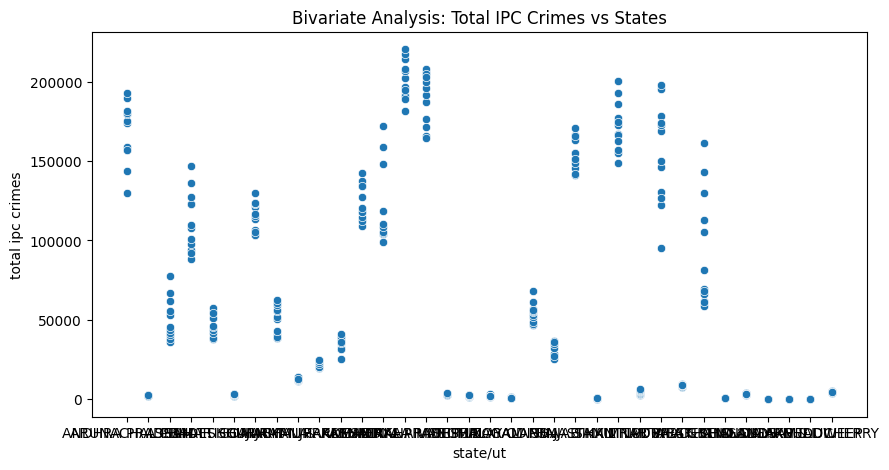

In [32]:
plt.figure(figsize=(10,5))

# Bivariate analysis with a scatterplot
sns.scatterplot(y='total ipc crimes', x='state/ut', data=details)

plt.title('Bivariate Analysis: Total IPC Crimes vs States')
plt.show()

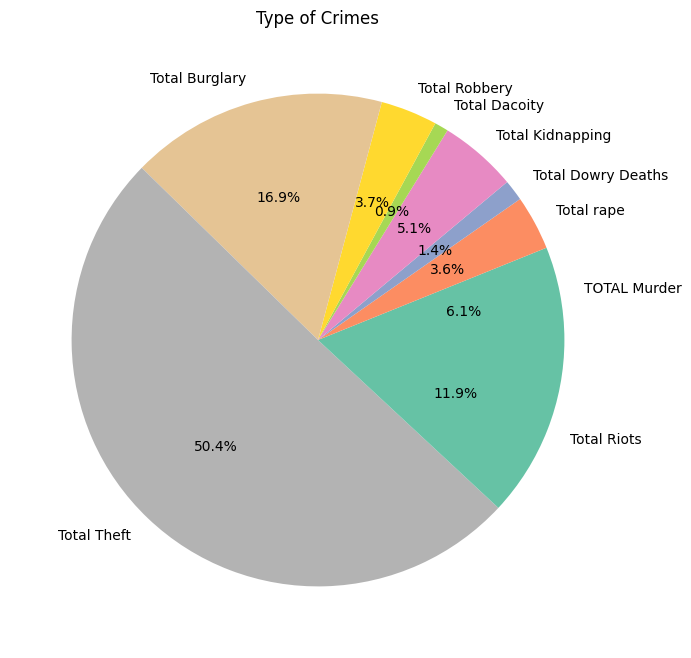

In [33]:

tot_murder= df3['murder'].sum()
tot_rape= df3['rape'].sum()
tot_dowrydeaths = df3['dowry deaths'].sum()

tot_kidnap= df3['kidnapping & abduction'].sum()
tot_dacoity= df3['dacoity'].sum()
tot_robbery = df3['robbery'].sum()
tot_burglary= df3['burglary'].sum()
tot_theft= df3['theft'].sum()
tot_riots = df3['riots'].sum()

crime_group = ['TOTAL Murder','Total rape','Total Dowry Deaths','Total Kidnapping','Total Dacoity','Total Robbery','Total Burglary','Total Theft','Total Riots']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,tot_theft,tot_riots]

colors=sns.color_palette("Set2")

plt.figure(figsize=(10,8))
plt.pie(values, labels=crime_group, colors=colors, autopct='%1.1f%%')
plt.title('Type of Crimes')
plt.show()

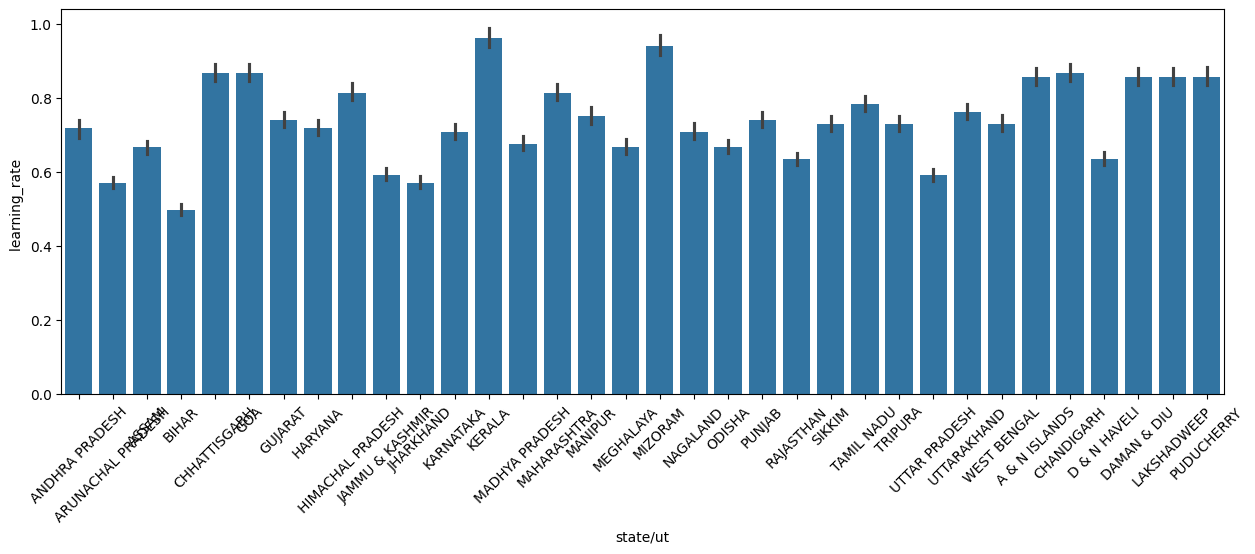

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(x='state/ut', y='learning_rate ',data=details)
plt.xticks(rotation=45)
plt.show()

In [35]:
df3.columns

Index(['unnamed: 0', 'state/ut', 'year', 'murder', 'attempt to murder',
       'culpable homicide not amounting to murder', 'rape',
       'kidnapping & abduction', 'dacoity',
       'preparation and assembly for dacoity', 'robbery', 'burglary', 'theft',
       'auto theft', 'other theft', 'riots', 'criminal breach of trust',
       'cheating', 'counterfieting', 'arson', 'hurt/grevious hurt',
       'dowry deaths', 'assault on women with intent to outrage her modesty',
       'insult to modesty of women', 'cruelty by husband or his relatives',
       'importation of girls from foreign countries',
       'causing death by negligence', 'other ipc crimes', 'total ipc crimes',
       'population', 'males', 'females', 'learning_rate ', 'area (sq_m)'],
      dtype='object')

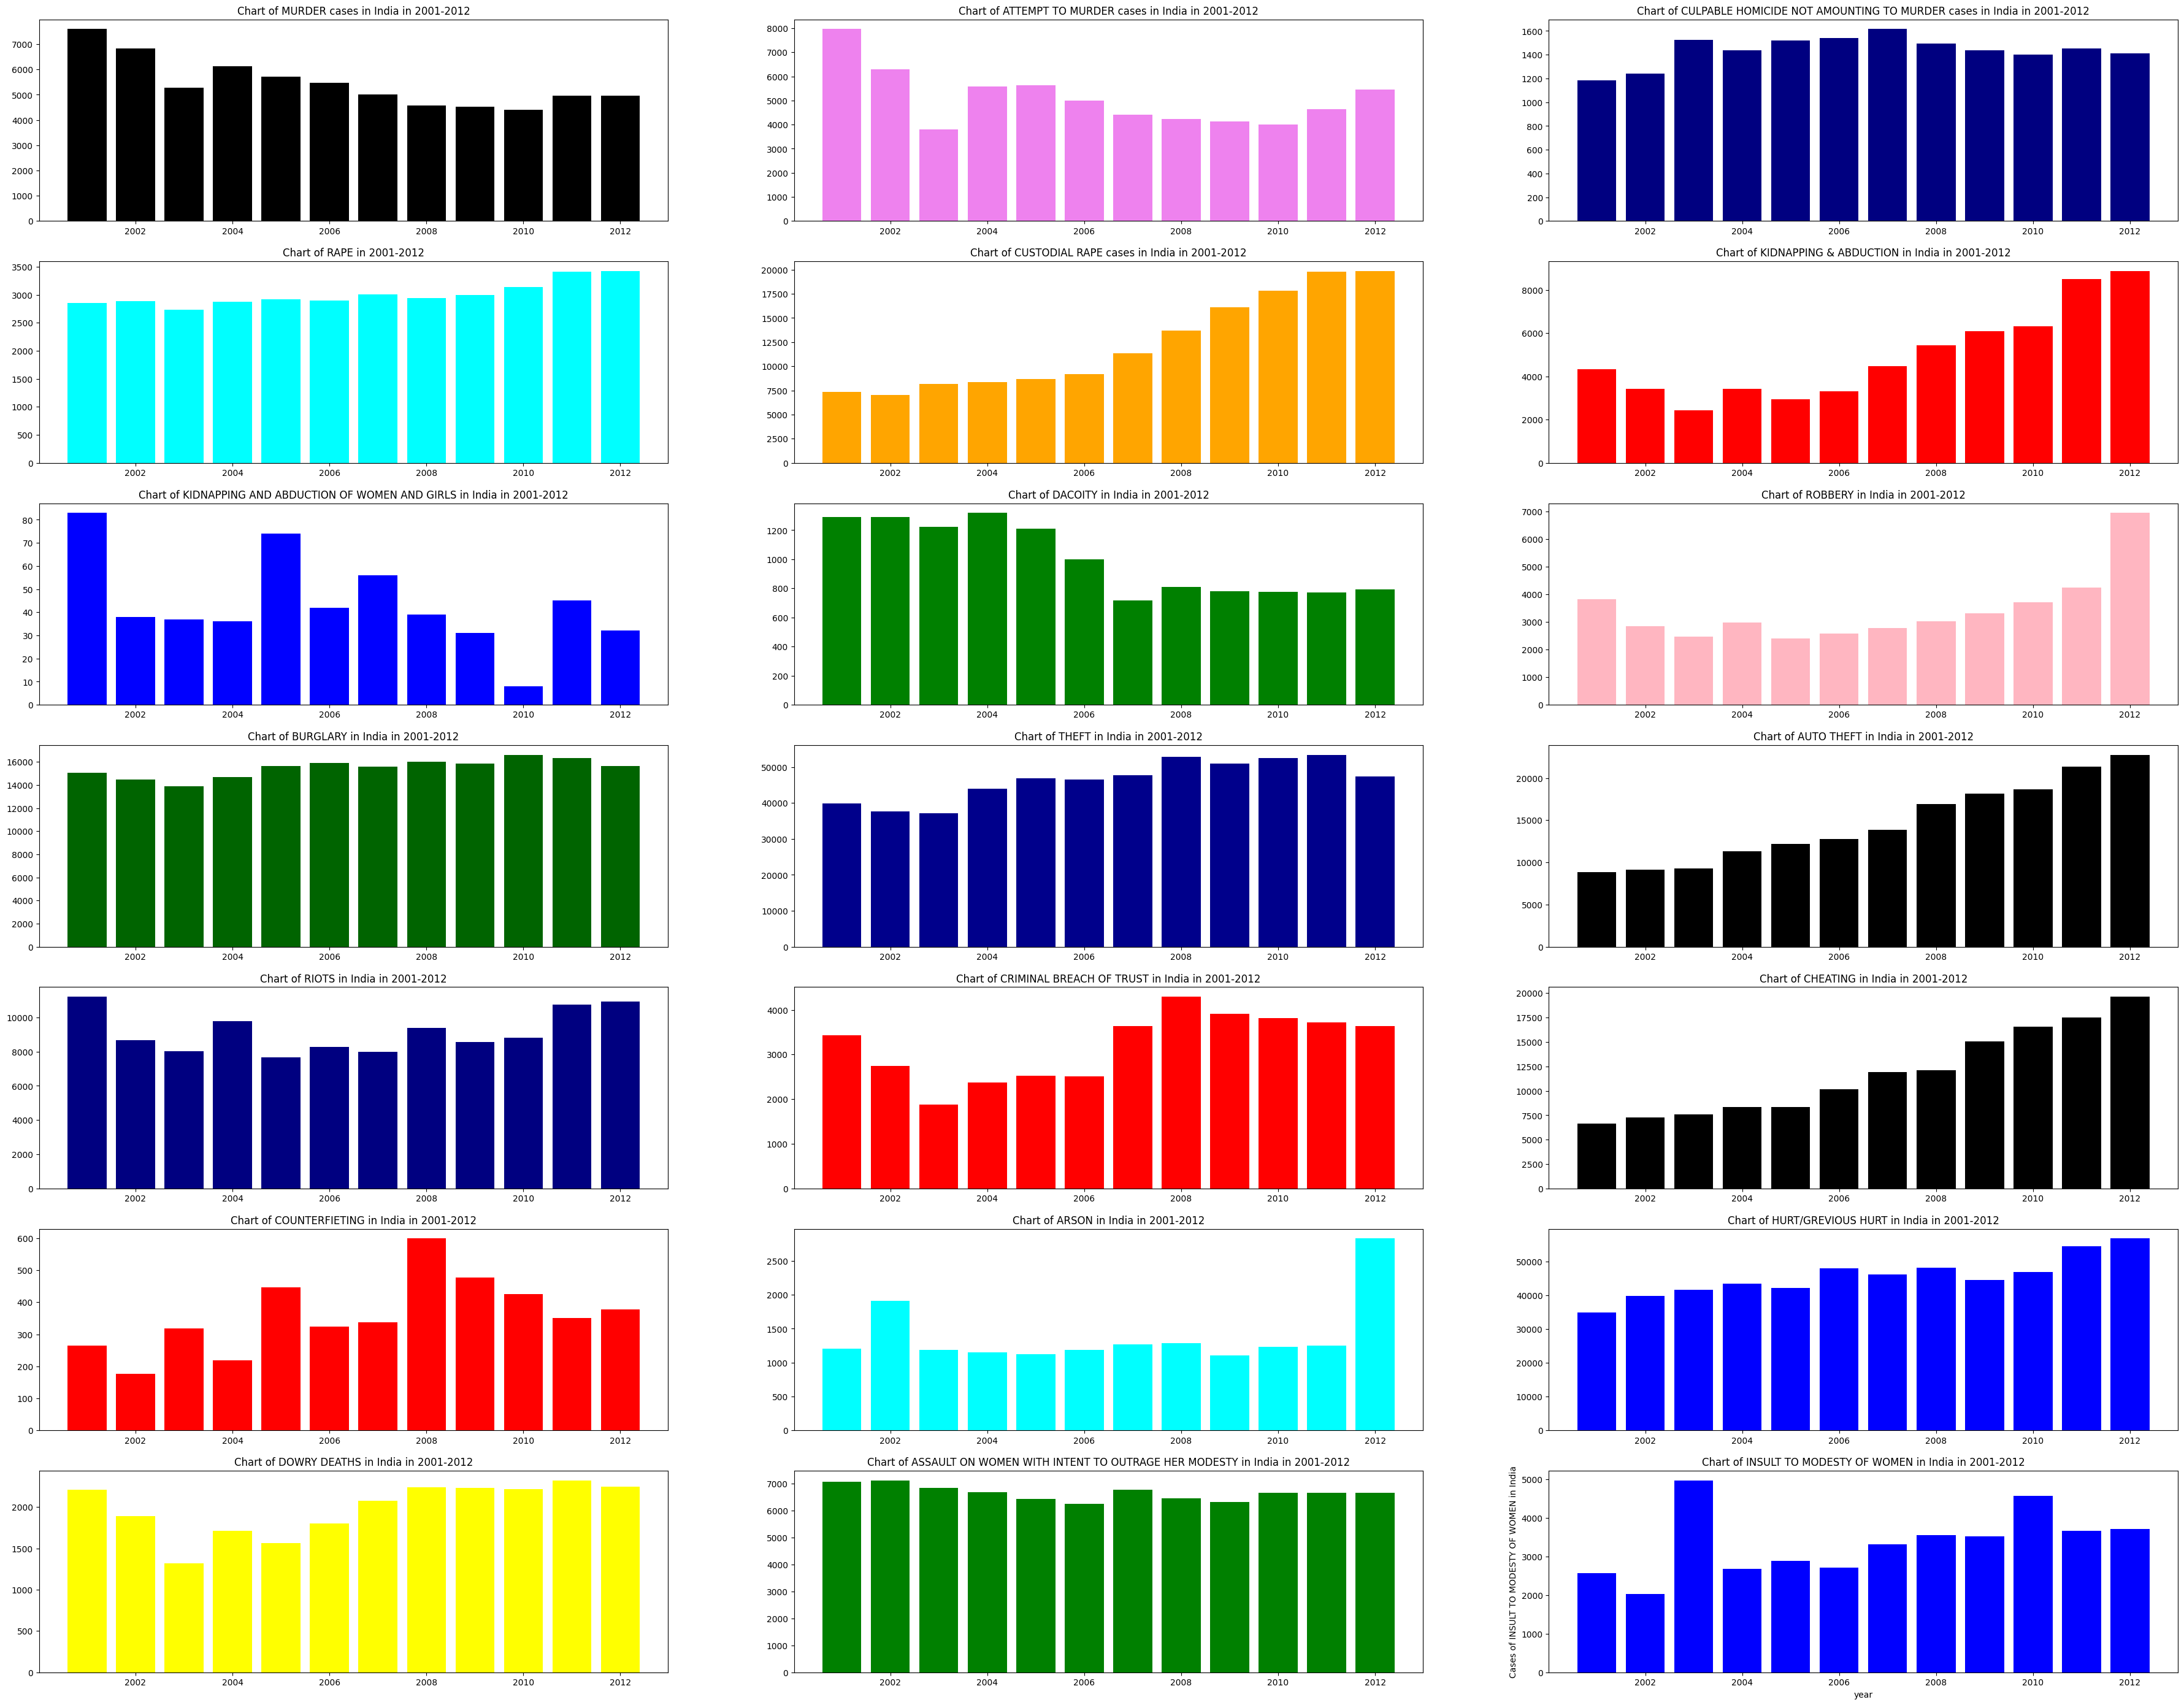

In [36]:
#Bar charts of every crime over time from the year 2001 to 2012
fig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(df3['year'], df3['murder'], color = 'black');
plt.xlabel('year')
plt.ylabel('Cases of MURDER in India')

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(df3['year'], df3['attempt to murder'], color = 'violet');
plt.xlabel('year')
plt.ylabel('Cases of ATTEMPT TO MURDER in India')

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(df3['year'], df3['culpable homicide not amounting to murder'], color = 'navy');
plt.xlabel('year')
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India')

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(df3['year'], df3['rape'], color = 'cyan');
plt.xlabel('year')
plt.ylabel('Cases of RAPE in India')

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(df3['year'], df3['cruelty by husband or his relatives'], color = 'orange');
plt.xlabel('year')
plt.ylabel('Cases of CRUELTY by Husband/relatives in India')

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(df3['year'], df3['kidnapping & abduction'], color = 'red');
plt.xlabel('year')
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India')

axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS in India in 2001-2012")
axes[2,0].bar(df3['year'], df3['importation of girls from foreign countries'], color = 'blue');
plt.xlabel('year')
plt.ylabel('importation of girls from foreign countries in India')


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(df3['year'], df3['dacoity'], color = 'green');
plt.xlabel('year')
plt.ylabel('Cases of DACOITY in India')

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(df3['year'], df3['robbery'], color = 'lightpink');
plt.xlabel('year')
plt.ylabel('Cases of ROBBERY in India')

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(df3['year'], df3['burglary'], color = 'darkgreen');
plt.xlabel('year')
plt.ylabel('Cases of BURGLARY in India')


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(df3['year'], df3['theft'], color = 'darkblue');
plt.xlabel('year')
plt.ylabel('Cases of THEFT in India')



axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(df3['year'], df3['auto theft'], color = 'black');
plt.xlabel('year')
plt.ylabel('Cases of AUTO THEFT in India')


axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(df3['year'], df3['riots'], color = 'navy');
plt.xlabel('year')
plt.ylabel('Cases of RIOTS')

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(df3['year'], df3['criminal breach of trust'], color = 'red');
plt.xlabel('year')
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India')


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(df3['year'], df3['cheating'], color = 'black');
plt.xlabel('year')
plt.ylabel('Cases of CHEATING in India')

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(df3['year'], df3['counterfieting'], color = 'red');
plt.xlabel('year')
plt.ylabel('Cases of COUNTERFIETING in India')

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(df3['year'], df3['arson'], color = 'cyan');
plt.xlabel('year')
plt.ylabel('Cases of ARSON in India')


axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(df3['year'], df3['hurt/grevious hurt'], color = 'blue');
plt.xlabel('year')
plt.ylabel('Cases of HURT/GREVIOUS HURT in India')

axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(df3['year'], df3['dowry deaths'], color = 'yellow');
plt.xlabel('year')
plt.ylabel('Cases of DOWRY DEATHS in India')

axes[6,1].set_title("Chart of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India in 2001-2012")
axes[6,1].bar(df3['year'], df3['assault on women with intent to outrage her modesty'], color = 'green');
plt.xlabel('year')
plt.ylabel('Cases of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India')

axes[6,2].set_title("Chart of INSULT TO MODESTY OF WOMEN in India in 2001-2012")
axes[6,2].bar(df3['year'], df3['insult to modesty of women'], color = 'blue');
plt.xlabel('year')
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India');

Each graph indicates the growth in crime over the period of years that is really concerning.

In [37]:
df_area=df3[['state/ut','year','total ipc crimes','area (sq_m)']]
df_area

,state/ut,year,total ipc crimes,area (sq_m)
0,ANDHRA PRADESH,2001,130089,275045
1,ARUNACHAL PRADESH,2001,2342,83743
2,ASSAM,2001,36877,78438
3,BIHAR,2001,88432,94163
4,CHHATTISGARH,2001,38460,135192
...,...,...,...,...
403,CHANDIGARH,2012,3606,114
404,D & N HAVELI,2012,318,491
405,DAMAN & DIU,2012,239,111
406,LAKSHADWEEP,2012,60,30


Each state crime report.
=====
 There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

**Report Summary on Indian Crime (2001-2012)**

The period from 2001 to 2012 witnessed significant fluctuations in crime rates across various states and Union Territories in India. The data reveals a correlation between population increase and crime rate, suggesting that as the population grew, so did the incidence of crime.



* States with larger populations like Madhya Pradesh, Maharashtra, and Andhra
Pradesh reported higher crime rates, ranking 1st, 2nd, and 3rd respectively in total crimes. This suggests that densely populated areas may be more susceptible to crime due to factors such as increased anonymity, social disorganization, and greater availability of targets.


* The rise in crime rates has profound implications for society. It can lead to a general sense of insecurity and fear among citizens, impacting their quality of life. It can also strain the judicial system, leading to delayed justice.


* However, it’s important to note the regional variations. For instance, Andaman & Nicobar Islands saw a decline in crime rate from 2001 to 2012 despite an increase in population. This could be attributed to effective law enforcement or socio-economic factors unique to the region.


* Smaller states and Union Territories like Goa, Manipur, Meghalaya, and Lakshadweep reported lower crime counts, possibly due to their smaller populations and effective local governance.


* Interestingly, Kerala, despite being the state with the highest literacy rate, reported a high crime count, indicating that crime is influenced by a complex interplay of factors beyond literacy and education.


In conclusion, while there is a general trend of increasing crime with population growth, the relationship between the two is complex and influenced by various socio-economic and regional factors. Addressing this issue requires a multifaceted approach, including effective law enforcement, socio-economic development, and education.


**State-Wise Report on Indian Crime (2001-2012)**



* Andaman & Nicobar Islands: Despite an increase in population, the crime rate declined from 184.75 in 2001 to a lower rate in 2012, with the highest rate of 250.04 in 2009.
* Andhra Pradesh: The state reported a total of 2,018,981 IPC crimes in 2012, coinciding with its highest population count.
* Arunachal Pradesh: With a total of 27,652 IPC crimes and a population of 1,407,014, the state had a crime rate of 171.
* Assam: The state, with 597,764 total IPC crimes, ranked 14th in terms of crime rate.
* Bihar: The state reported 1,346,293 total IPC crimes, ranking 10th in terms of crime rate.
* Chandigarh: This Union Territory, with a smaller population, reported 40,807 total IPC crimes.
* Chhattisgarh: The state reported 561,027 total IPC crimes, ranking 15th in terms of crime rate.
* Dadra & Nagar Haveli: This Union Territory, with an area of 491 km square, reported only 4,651 total IPC crimes over 11 years.
* Daman & Diu: This Union Territory, with an area of 12 km square, reported 4,651 crimes, indicating that smaller areas with less population tend to have fewer crimes.
* Goa: The smallest state of India, with an area of 3,702 km2, reported 32,051 crimes from 2001 to 2012.
* Gujarat: Known as a hub for the textile business, the state reported 1,385,775 crimes, ranking 8th in terms of crime rate.
* Haryana: The state reported 595,303 total IPC crimes over 11 years, with a crime rate of 245 per capita.
* Himachal Pradesh: The state reported 154,948 crimes from 2001 to 2012.
* Jammu & Kashmir: The state reported 259,155 crimes from 2001 to 2012.
* Jharkhand: The state reported 422,351 crimes from 2001 to 2012.
* Karnataka: The state reported 1,481,063 crimes from 2001 to 2012, with a crime rate of 214 (average).
* Kerala: Despite being the state with the highest literacy rate, Kerala reported 1,437,459 total crimes from 2001 to 2012.
* Lakshadweep: This Union Territory reported the lowest crime count of 743 over 11 years.
* Madhya Pradesh: One of the top 3 states with higher crimes, it reported 2,413,770 crimes.
* Maharashtra: The 2nd state with the highest crime, it reported a large number of crimes.
* Manipur: A small and less populated state.
* Meghalaya: A small and less populated state.
* Mizoram: With a population count of 1,110,132, the state reported 35,072 total crimes.
* Nagaland: The state reported 13,133 crimes from 2001 to 2012.
* Odisha: The state reported 647,946 crimes from 2001 to 2012.
* Puducherry: The Union Territory reported 54,116 total crimes over 11 years.
* Punjab: The state reported 384,131 crimes from 2001 to 2012.
* Rajasthan: The largest state in India in terms of area, it covers over 342,000 square kilometers.
* Sikkim: The state reported 7,000 crimes from 2001 to 2012.
* Tamil Nadu: The 3rd state with the highest crimes in India, it reported 2,060,176 crimes.
* Tripura: The state reported 52,734 total IPC counts from 2001 to 2012.
* Uttar Pradesh: The most populated state, it ranks 5th in total crimes.
* Uttarakhand: The state reported 103,204 total IPC crimes from 2001 to 2012.
* West Bengal: The state reported 1,119,304 crimes from 2001 to 2012.










Phase: 3 SQL resolutions

###################3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.
 select state, years, district, max(murder) as murders,  from crimes_india
 group by state, years;

 SELECT `State`, `Years`, `DISTRICT`, `MURDER`
FROM (
    SELECT `State`, `Years`, `DISTRICT`, `MURDER`,
           RANK() OVER (PARTITION BY `State`, `Years` ORDER BY `MURDER` DESC) murder_rank
    FROM `crimes_india`
) tmp
WHERE murder_rank = 1;
3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [38]:
import sqlite3
import csv
import pandas as pd

In [39]:
db = sqlite3.connect(":memory:")  # Create an in-memory database
cursor = db.cursor()
cursor.execute("DROP TABLE IF EXISTS crimes_india")


3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [40]:
cursor.execute (" create table crimes_india(States varchar(100),District varchar(100),Years int,Murder int,Murder_attempts int,Rape int)")

In [41]:
db.commit()

In [42]:
with open('/content/drive/MyDrive/Data Analysis/Data/crimes_india.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crimes_india VALUES(?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

In [43]:
print(no_records,'Records Inserted')

8598 Records Inserted


In [44]:
dfsql=pd.read_sql("SELECT  States, Years,District ,MAX(Murder) AS Murders FROM crimes_india women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY States ORDER BY MURDER DESC ",db)
result=cursor.execute("SELECT  States, Years,District ,MAX(Murder) FROM crimes_india women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY States ORDER BY MURDER DESC")
for row in result:
    print(row)

('State', 'Years', 'District', 'Murder')
('Bihar', 2004, 'Patna', 542)
('Uttar Pradesh', 2001, 'Muzaffarnagar', 324)
('Maharashtra', 2001, 'Mumbai', 295)
('Jharkhand', 2002, 'Ranchi', 270)
('West Bengal', 2010, 'Paschim Midnapur', 268)
('Karnataka', 2010, 'Bangalore Commr.', 266)
('Gujarat', 2002, 'Ahmedabad Commr.', 222)
('Andhra Pradesh', 2001, 'Ranga Reddy', 214)
('Tamil Nadu', 2012, 'Chennai', 180)
('Jammu & Kashmir', 2001, 'Baramulla', 144)
('Assam', 2007, 'Tinsukia', 143)
('Madhya Pradesh', 2004, 'Jhabua', 139)
('Chhattisgarh', 2006, 'Bizapur', 139)
('Tripura', 2003, 'West', 136)
('Delhi Ut', 2002, 'North West', 135)
('Odisha', 2009, 'Keonjhar', 109)
('Rajasthan', 2011, 'Alwar', 104)
('Uttarakhand', 2001, 'Haridwar', 94)
('Haryana', 2006, 'Gurgaon', 93)
('Punjab', 2010, 'Cp Ludhiana', 90)
('Nagaland', 2008, 'Dimapur', 64)
('Manipur', 2007, 'Imphal West', 61)
('Kerala', 2002, 'Trivandrum', 58)
('Meghalaya', 2003, 'Jaintia Hills', 52)
('Himachal Pradesh', 2003, 'Kangra', 38)
('Goa'

In [45]:
result=cursor.execute("SELECT `States`, `Years`, `DISTRICT`, `MURDER` FROM (SELECT `States`, `Years`, `DISTRICT`, `MURDER`,RANK() OVER (PARTITION BY `States`, `Years` ORDER BY `MURDER` DESC) murder_rank FROM `crimes_india`) tmp WHERE murder_rank = 1;")
for row in result:
    print(row)

('A & N Islands', 2001, 'Andaman', 13)
('A & N Islands', 2002, 'Andaman', 14)
('A & N Islands', 2003, 'Andaman', 16)
('A & N Islands', 2004, 'Andaman', 13)
('A & N Islands', 2005, 'Andaman', 14)
('A & N Islands', 2006, 'Andaman', 3)
('A & N Islands', 2007, 'A And N Islands', 15)
('A & N Islands', 2008, 'Andaman', 8)
('A & N Islands', 2009, 'Andaman', 15)
('A & N Islands', 2010, 'Andaman', 8)
('A & N Islands', 2011, 'Andaman', 14)
('A & N Islands', 2012, 'South', 8)
('Andhra Pradesh', 2001, 'Ranga Reddy', 214)
('Andhra Pradesh', 2002, 'Ranga Reddy', 214)
('Andhra Pradesh', 2003, 'Guntur', 210)
('Andhra Pradesh', 2004, 'Mahaboobnagar', 183)
('Andhra Pradesh', 2005, 'Mahaboobnagar', 212)
('Andhra Pradesh', 2006, 'Cyberabad', 193)
('Andhra Pradesh', 2007, 'Cyberabad', 186)
('Andhra Pradesh', 2008, 'Cyberabad', 197)
('Andhra Pradesh', 2009, 'Cyberabad', 186)
('Andhra Pradesh', 2010, 'Cyberabad', 187)
('Andhra Pradesh', 2011, 'Cyberabad', 213)
('Andhra Pradesh', 2012, 'Cyberabad', 198)
('Aru

In [46]:
dfsql=pd.read_sql("SELECT `States`, `Years`, `DISTRICT`, `MURDER` FROM (SELECT `States`, `Years`, `DISTRICT`, `MURDER`,RANK() OVER (PARTITION BY `States`, `Years` ORDER BY `MURDER` DESC) murder_rank FROM `crimes_india`) tmp WHERE murder_rank = 1;",db)

In [47]:
#converting into dataframe
dfsql

,States,Years,DISTRICT,MURDER
0,A & N Islands,2001,Andaman,13
1,A & N Islands,2002,Andaman,14
2,A & N Islands,2003,Andaman,16
3,A & N Islands,2004,Andaman,13
4,A & N Islands,2005,Andaman,14
...,...,...,...,...
436,West Bengal,2008,24 Parganas South,239
437,West Bengal,2009,24 Parganas North,229
438,West Bengal,2010,Paschim Midnapur,268
439,West Bengal,2011,24 Parganas South,247


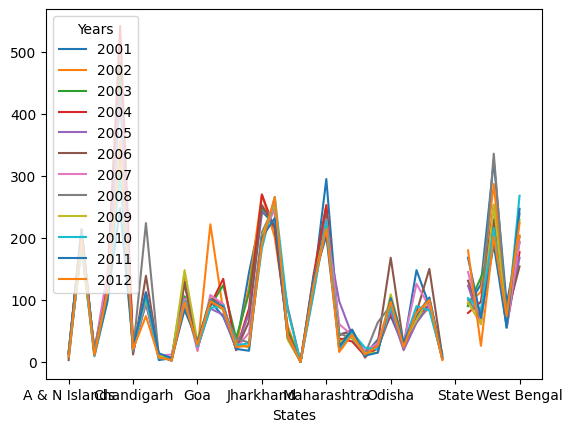

In [48]:
# @title Murder count by State over time

dfsql.groupby(['States', 'Years'])['MURDER'].sum().unstack().plot(kind='line');

Phase 4







Unsupervised ML (Clustering)







Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.







Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.







4.1  "Create 3 clusters as below.







1. Sensitive Area's







2. Moderate Area's







3. Peaceful Area's"







4.2  Create DataFrame for each cluster that shows data according to the areas.







4.3  "Analyse your clusters and prepare a report that explains all your observations.







Example -







1. What is impacting more crimes in sensitive areas.







2. What needs to be done to reduce crime.







3. Most safe and unsafe districts.







4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"







4.4   Capstone project overall story in your own words. Min 1000 words.

loading the necessary files for clustering and extracting the necessary files needed to conduct the study and base our conclusions

In [49]:
district_wise=pd.read_csv(r"/content/drive/MyDrive/Data Analysis/Data/final project/01_District_wise_crimes_committed_IPC_2001_2012.csv")
dist_sc =pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/final project/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
dist_st=pd.read_csv(r"/content/drive/MyDrive/Data Analysis/Data/final project/02_District_wise_crimes_committed_against_ST_2001_2012.csv")
crime_child=pd.read_csv(r"/content/drive/MyDrive/Data Analysis/Data/final project/03_District_wise_crimes_committed_against_children_2001_2012.csv")
crime_women=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/final project/42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [50]:
district_wise.columns=district_wise.columns.str.lower()

In [51]:
district_wise.drop(columns={"custodial rape","other rape"},inplace = True)

In [52]:
district_wise = district_wise[~district_wise['district'].str.contains('TOTAL|DELHI UT TOTAL')]

In [53]:
dist_sc=dist_sc[~dist_sc['DISTRICT'].str.contains('TOTAL|DELHI UT TOTAL')]

In [54]:
dist_st=dist_st[~dist_st['district'].str.contains('TOTAL|DELHI UT TOTAL')]

In [55]:
crime_child = crime_child[~crime_child['DISTRICT'].str.contains('TOTAL|DELHI UT TOTAL')]

In [56]:
crime_women = crime_women[~crime_women['DISTRICT'].str.contains('TOTAL|DELHI UT TOTAL')]

In [57]:
dist_sc.columns=dist_sc.columns.str.lower()

In [58]:
dist_sc

,state/ut,district,year,murder,rape,kidnapping and abduction,dacoity,robbery,arson,hurt,prevention of atrocities (poa) act,protection of civil rights (pcr) act,other crimes against scs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,2,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0


In [59]:
dist_st.rename(columns={"states":'state/ut',"years":"year"},inplace= True)

In [60]:
dist_st

,state/ut,district,year,murder,rape,kidnapping,dacoity,robbery,arson,hurt,PCR,POA,other_crimes
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,0,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0


In [61]:
crime_child.columns=crime_child.columns.str.lower()

In [62]:
crime_child

,state/ut,district,year,murder,rape,kidnapping and abduction,foeticide,abetment of suicide,exposure and abandonment,procuration of minor girls,buying of girls for prostitution,selling of girls for prostitution,prohibition of child marriage act,other crimes,total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,DELHI,STF,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9008,DELHI,WEST,2012,3.0,46.0,427.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7


In [63]:
crime_women.columns=crime_women.columns.str.lower()

In [64]:
crime_women

,state/ut,district,year,rape,kidnapping and abduction,dowry deaths,assault on women with intent to outrage her modesty,insult to modesty of women,cruelty by husband or his relatives,importation of girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,79,256,18,53,6,327,0
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0


extracting and converting the above pulled data in the format easy to form clusters

In [65]:
dist_sc['attrocities_against_SC']=dist_sc.iloc[:,3:].sum(axis=1)
dist_st['attrocities against_ST']=dist_st.iloc[:,3:].sum(axis=1)

In [66]:
crime_child=crime_child[crime_child['district']!='total']
crime_child.rename(columns={"total":"attrocities_against_child"},inplace=True)

In [67]:
crime_women=crime_women[crime_women['district']!="total"]
crime_women['attrocities_against_women']=crime_women.iloc[:,3:].sum(axis=1)

In [68]:
districtwise_sc=dist_sc[['state/ut', 'district', 'year','attrocities_against_SC']]

districtwise_st=dist_st[['state/ut', 'district', 'year','attrocities against_ST']]

districtwise_child=crime_child[['state/ut', 'district', 'year','attrocities_against_child']]

districtwise_women=crime_women[['state/ut', 'district', 'year','attrocities_against_women']]

converting the columns to lower letters to avoid any errors

In [69]:
cluster=pd.merge(district_wise,districtwise_sc,how='inner',left_on=['state/ut', 'district', 'year'],right_on=['state/ut', 'district', 'year']).merge(districtwise_st,how='inner',
                  left_on=['state/ut', 'district', 'year'],right_on=['state/ut', 'district', 'year']).merge(districtwise_child,how='inner',
                    left_on=['state/ut', 'district', 'year'],right_on=['state/ut', 'district', 'year']).merge(districtwise_women,how='inner',left_on=['state/ut', 'district', 'year'],right_on=['state/ut', 'district', 'year'])


on the above created cluster also adding the Learning rate and area sq meters

In [70]:
details

,state/ut,year,other ipc crimes,total ipc crimes,population,males,females,learning_rate,area (sq_m)
0,ANDHRA PRADESH,2001,34344,130089,7.621001e+07,3.852741e+07,3.768259e+07,0.610000,275045
1,ARUNACHAL PRADESH,2001,618,2342,1.097968e+06,5.799410e+05,5.180270e+05,0.540000,83743
2,ASSAM,2001,9315,36877,2.665553e+07,1.377704e+07,1.287849e+07,0.630000,78438
3,BIHAR,2001,36667,88432,8.299851e+07,4.324380e+07,3.975471e+07,0.470000,94163
4,CHHATTISGARH,2001,15790,38460,2.083380e+07,1.047422e+07,1.035958e+07,0.820000,135192
...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,1042,3606,1.015823e+06,5.618017e+05,4.540213e+05,0.959054,114
404,D & N HAVELI,2012,112,318,2.487996e+05,1.348331e+05,1.139665e+05,0.701747,491
405,DAMAN & DIU,2012,46,239,1.782819e+05,1.025247e+05,7.575725e+04,0.947358,111
406,LAKSHADWEEP,2012,32,60,6.854198e+04,3.449981e+04,3.404218e+04,0.947358,30


In [71]:
con_det=pd.merge(cluster, details, on="state/ut",how= "inner")

In [72]:
con_det.drop(columns={"year_y","other ipc crimes_y","total ipc crimes_y"},inplace=True)
con_det

,state/ut,district,year_x,murder,attempt to murder,culpable homicide not amounting to murder,rape,kidnapping & abduction,kidnapping and abduction of women and girls,kidnapping and abduction of others,...,total ipc crimes_x,attrocities_against_SC,attrocities against_ST,attrocities_against_child,attrocities_against_women,population,males,females,learning_rate,area (sq_m)
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,46,30,16,...,4154,55,18,0,454,7.621001e+07,38527413.00,3.768259e+07,0.610000,275045
1,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,46,30,16,...,4154,55,18,0,454,8.192576e+07,41416969.00,4.050879e+07,0.658800,275045
2,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,46,30,16,...,4154,55,18,0,454,8.213057e+07,41520511.00,4.061006e+07,0.711504,275045
3,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,46,30,16,...,4154,55,18,0,454,8.253895e+07,41624313.00,4.091464e+07,0.717196,275045
4,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,46,30,16,...,4154,55,18,0,454,8.294987e+07,41728373.00,4.122150e+07,0.722934,275045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100903,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,17,14,3,...,3494,23,0,25,35,1.076627e+06,531385.00,5.452420e+05,0.856463,490
100904,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,17,14,3,...,3494,23,0,25,35,1.082044e+06,532713.00,5.493310e+05,0.863315,490
100905,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,17,14,3,...,3494,23,0,25,35,1.087496e+06,534045.00,5.534510e+05,0.870221,490
100906,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,17,14,3,...,3494,23,0,25,35,1.092982e+06,535380.00,5.576020e+05,0.939839,490


we now have our cluster ready where we have removed all the unnecessary rows and columns to ensure we are now able to cluster and work on drawing some final conclusions.

In [73]:
cluster

,state/ut,district,year,murder,attempt to murder,culpable homicide not amounting to murder,rape,kidnapping & abduction,kidnapping and abduction of women and girls,kidnapping and abduction of others,...,insult to modesty of women,cruelty by husband or his relatives,importation of girls from foreign countries,causing death by negligence,other ipc crimes,total ipc crimes,attrocities_against_SC,attrocities against_ST,attrocities_against_child,attrocities_against_women
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,46,30,16,...,34,175,0,181,1518,4154,55,18,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,53,30,23,...,24,154,0,270,754,4125,127,14,66,356
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,59,34,25,...,83,186,0,404,1262,5818,114,2,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,25,20,5,...,38,57,0,233,1181,3140,100,4,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,49,26,23,...,58,247,0,431,2313,6507,89,14,0,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,3,4,0,5,2,0,2,...,0,1,0,29,34,202,0,0,7,6
8405,DAMAN & DIU,DIU,2012,0,1,0,0,1,0,1,...,0,2,0,9,12,37,0,0,1,2
8406,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,0,32,60,0,0,0,2
8407,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,2,2,0,...,0,1,0,44,392,787,1,0,7,11


4.2 Create DataFrame for each cluster that shows data according to the areas.

In [74]:
x=cluster.iloc[:,2:]
x

,year,murder,attempt to murder,culpable homicide not amounting to murder,rape,kidnapping & abduction,kidnapping and abduction of women and girls,kidnapping and abduction of others,dacoity,preparation and assembly for dacoity,...,insult to modesty of women,cruelty by husband or his relatives,importation of girls from foreign countries,causing death by negligence,other ipc crimes,total ipc crimes,attrocities_against_SC,attrocities against_ST,attrocities_against_child,attrocities_against_women
0,2001,101,60,17,50,46,30,16,9,0,...,34,175,0,181,1518,4154,55,18,0,454
1,2001,151,125,1,23,53,30,23,8,0,...,24,154,0,270,754,4125,127,14,66,356
2,2001,101,57,2,27,59,34,25,4,0,...,83,186,0,404,1262,5818,114,2,0,456
3,2001,80,53,1,20,25,20,5,1,0,...,38,57,0,233,1181,3140,100,4,0,278
4,2001,82,67,1,23,49,26,23,4,0,...,58,247,0,431,2313,6507,89,14,0,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404,2012,3,4,0,5,2,0,2,1,0,...,0,1,0,29,34,202,0,0,7,6
8405,2012,0,1,0,0,1,0,1,0,0,...,0,2,0,9,12,37,0,0,1,2
8406,2012,0,0,0,0,0,0,0,0,0,...,0,1,0,0,32,60,0,0,0,2
8407,2012,5,6,2,6,2,2,0,0,1,...,0,1,0,44,392,787,1,0,7,11


In [75]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [76]:
# Calculating the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [77]:
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing");

In [78]:
knee.elbow

3

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
silhouette_coeffecient=[]

for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++",n_init=10)
  kmeans.fit(x)
  score=silhouette_score(x,kmeans.labels_)
  silhouette_coeffecient.append(score)

In [81]:
silhouette_coeffecient

[0.686768774746634,
 0.5765893826039006,
 0.5337421583489241,
 0.5152957912797044,
 0.4579116048551981,
 0.41361505358637624,
 0.4163218499753523,
 0.3927822815824859,
 0.3973509988610275]

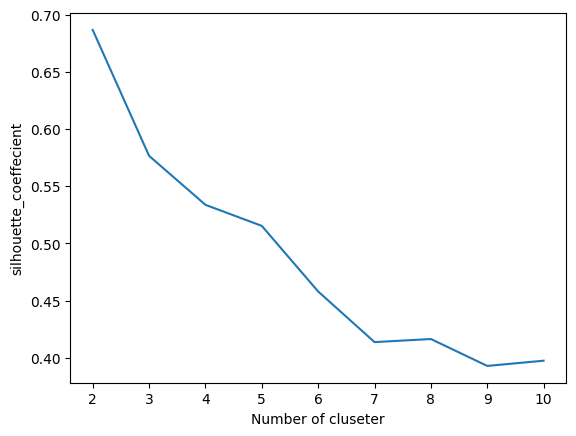

In [82]:
plt.plot(range(2,11),silhouette_coeffecient)
plt.xticks(range(2,11))
plt.xlabel("Number of cluseter")
plt.ylabel("silhouette_coeffecient")
plt.show()

In [112]:
peaceful_region = cluster[kmeans.labels_ == 1]

In [113]:
peaceful_region

,state/ut,district,year,murder,attempt to murder,culpable homicide not amounting to murder,rape,kidnapping & abduction,kidnapping and abduction of women and girls,kidnapping and abduction of others,...,insult to modesty of women,cruelty by husband or his relatives,importation of girls from foreign countries,causing death by negligence,other ipc crimes,total ipc crimes,attrocities_against_SC,attrocities against_ST,attrocities_against_child,attrocities_against_women
25,ANDHRA PRADESH,VIZIANAGARAM,2001,33,14,1,8,8,2,6,...,22,121,0,175,880,2178,44,29,0,193
41,ASSAM,BARPETA,2001,64,5,0,28,105,88,17,...,0,95,0,87,430,1778,0,0,0,250
45,ASSAM,DARRANG,2001,61,13,0,48,64,47,17,...,0,37,0,66,273,1454,0,0,0,197
47,ASSAM,DHUBRI,2001,65,23,0,43,69,51,18,...,0,111,0,47,204,1505,0,0,4,259
48,ASSAM,DIBRUGARH,2001,110,22,6,35,57,37,20,...,0,19,0,108,264,1565,0,0,0,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,UTTARAKHAND,DEHRADUN,2012,37,29,7,30,43,41,2,...,34,111,0,134,229,2189,7,3,57,253
8362,UTTARAKHAND,HARIDWAR,2012,74,54,9,47,106,73,33,...,17,89,0,176,521,2613,2,0,24,274
8368,UTTARAKHAND,UDHAMSINGH NAGAR,2012,52,50,8,30,95,91,4,...,0,128,0,236,785,2314,5,0,15,309
8380,WEST BENGAL,DARJEELING,2012,27,17,15,10,47,39,8,...,4,106,0,123,158,1574,8,12,1,213


In [114]:
peaceful_region['total']=peaceful_region.iloc[:,2:].sum(axis=1)

<ipython-input-114-b964338876f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaceful_region['total']=peaceful_region.iloc[:,2:].sum(axis=1)


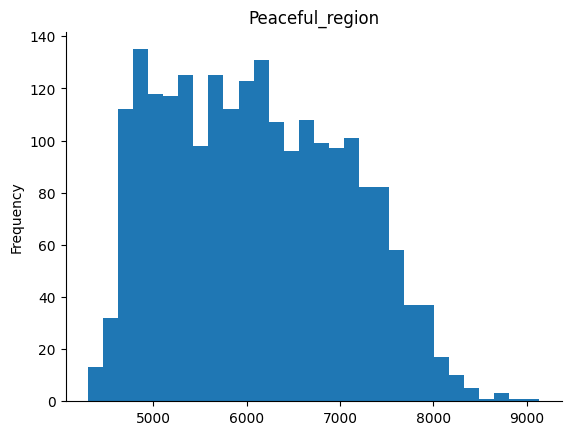

In [115]:
peaceful_region['total'].plot(kind='hist', bins=30, title='Peaceful_region')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [108]:
moderate_region = cluster[kmeans.labels_ == 3]

In [109]:
moderate_region['total']=moderate_region.iloc[:,2:].sum(axis=1)

<ipython-input-109-a46ebfeb2252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_region['total']=moderate_region.iloc[:,2:].sum(axis=1)


In [110]:
moderate_region

,state/ut,district,year,murder,attempt to murder,culpable homicide not amounting to murder,rape,kidnapping & abduction,kidnapping and abduction of women and girls,kidnapping and abduction of others,...,cruelty by husband or his relatives,importation of girls from foreign countries,causing death by negligence,other ipc crimes,total ipc crimes,attrocities_against_SC,attrocities against_ST,attrocities_against_child,attrocities_against_women,total
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,53,30,23,...,154,0,270,754,4125,127,14,66,356,11233
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,25,20,5,...,57,0,233,1181,3140,100,4,0,278,8861
13,ANDHRA PRADESH,MEDAK,2001,101,56,12,35,26,20,6,...,192,0,335,454,3532,61,9,34,398,9879
16,ANDHRA PRADESH,NIZAMABAD,2001,106,49,14,21,38,21,17,...,228,0,220,787,3621,46,13,54,359,9987
17,ANDHRA PRADESH,PRAKASHAM,2001,102,82,3,19,31,12,19,...,119,0,263,808,3678,114,12,3,395,10190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,WEST BENGAL,COOCHBEHAR,2012,48,94,25,92,179,169,10,...,539,0,119,1562,3491,1,0,2,950,10410
8379,WEST BENGAL,DAKSHIN DINAJPUR,2012,53,238,8,66,142,107,35,...,342,0,117,1046,2725,2,16,128,619,8621
8397,WEST BENGAL,SILIGURI_PC,2012,32,6,6,21,123,111,12,...,370,0,69,385,3023,0,8,44,552,9634
8402,CHANDIGARH,CHANDIGARH,2012,21,44,5,27,87,66,21,...,73,0,3,1042,3606,2,0,96,241,11199


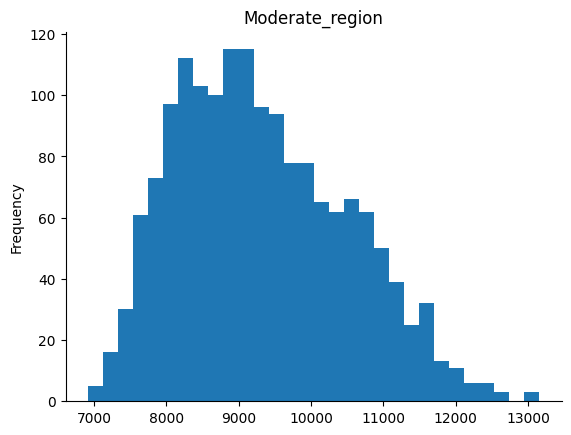

In [111]:
moderate_region['total'].plot(kind='hist', bins=30, title='Moderate_region')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [116]:
sensitive_region= cluster[kmeans.labels_ == 2]

In [117]:
sensitive_region['total']=sensitive_region.iloc[:,2:].sum(axis=1)

<ipython-input-117-fd55b507efe3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_region['total']=sensitive_region.iloc[:,2:].sum(axis=1)


In [118]:
sensitive_region

,state/ut,district,year,murder,attempt to murder,culpable homicide not amounting to murder,rape,kidnapping & abduction,kidnapping and abduction of women and girls,kidnapping and abduction of others,...,cruelty by husband or his relatives,importation of girls from foreign countries,causing death by negligence,other ipc crimes,total ipc crimes,attrocities_against_SC,attrocities against_ST,attrocities_against_child,attrocities_against_women,total
274,KERALA,ERNAKULAM,2001,44,67,7,38,20,7,13,...,161,0,0,9669,14843,41,1,13,374,33400
292,MADHYA PRADESH,BHOPAL,2001,61,109,0,106,55,48,7,...,132,0,272,9372,13708,185,66,102,609,31785
305,MADHYA PRADESH,INDORE,2001,111,133,1,84,50,35,15,...,161,0,269,6567,13063,38,99,115,583,31720
490,RAJASTHAN,JAIPUR,2001,91,90,6,61,247,203,44,...,453,0,749,8173,20604,284,85,24,926,47982
944,KERALA,ERNAKULAM,2002,36,80,18,27,12,9,3,...,179,0,5,10360,15673,56,1,14,392,34982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,KERALA,THRISSUR RURAL,2012,18,49,9,46,12,9,3,...,361,0,3,10479,13403,37,5,76,672,29822
7996,MADHYA PRADESH,BHOPAL,2012,78,96,0,143,63,49,14,...,254,0,270,7560,14320,86,11,218,761,34396
8010,MADHYA PRADESH,INDORE,2012,123,172,3,173,54,42,12,...,448,0,452,11819,21091,82,35,380,1206,50321
8234,TAMIL NADU,CHENNAI,2012,180,219,4,94,87,65,22,...,237,0,1411,12131,19881,19,0,108,639,44796


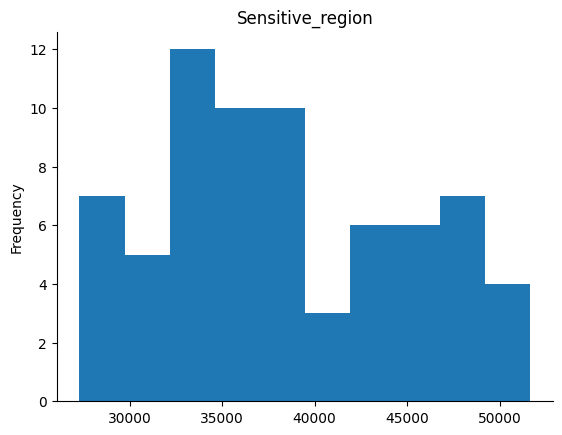

In [119]:
sensitive_region['total'].plot(kind='hist', bins=10, title='Sensitive_region')
plt.gca().spines[['top', 'right',]].set_visible(False)


4.3 "Analyse your clusters and prepare a report that explains all your observations.

* What is impacting more crimes in sensitive areas.
* What needs to be done to reduce crime.
* Most safe and unsafe districts.
* Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"








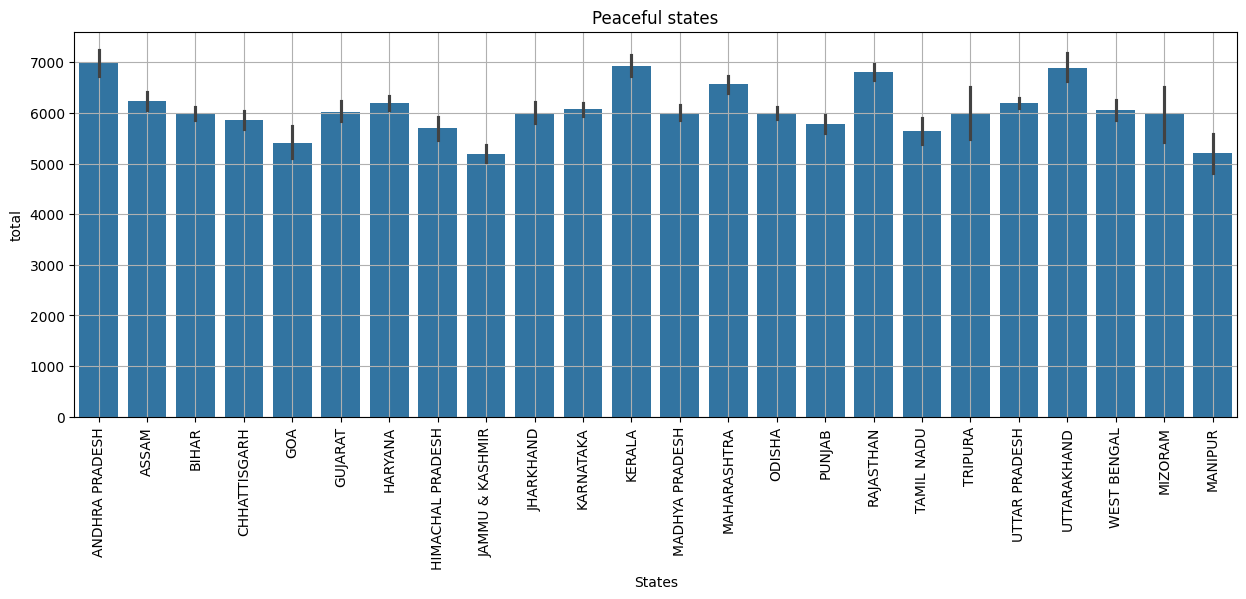

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(x=peaceful_region['state/ut'],y=peaceful_region['total'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.title("Peaceful states")
plt.grid()
plt.show()

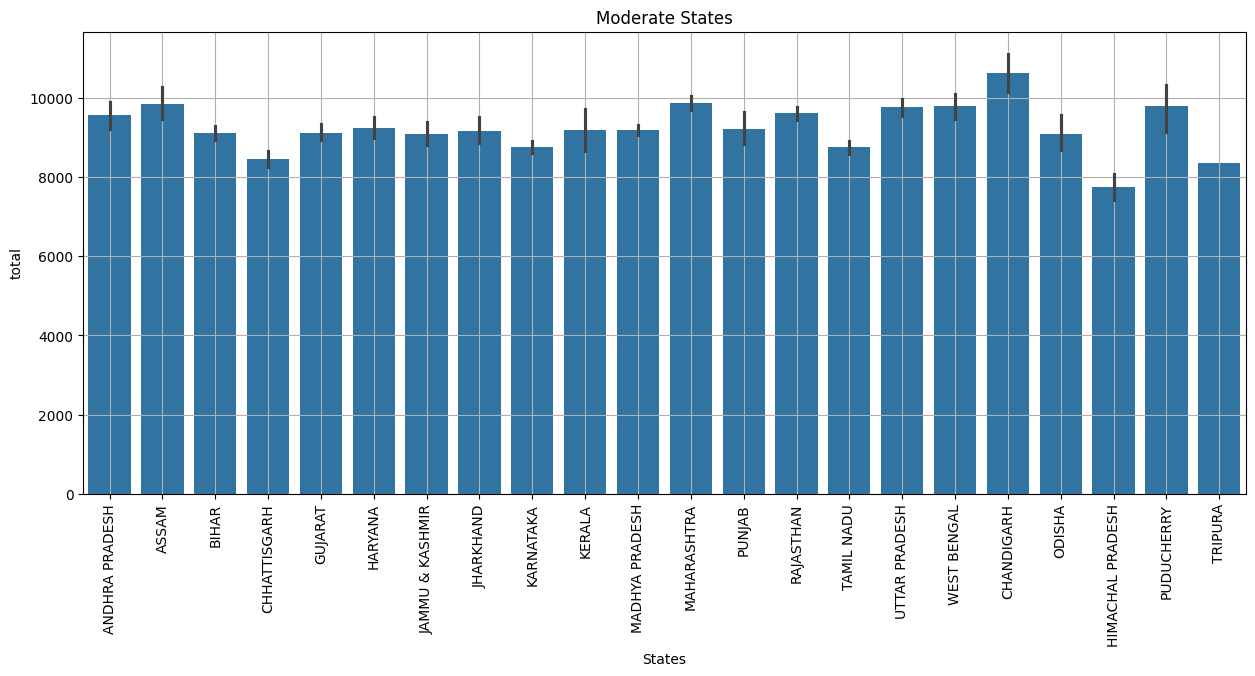

In [121]:
plt.figure(figsize=(15,6))
sns.barplot(x=moderate_region['state/ut'],y=moderate_region['total'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.title("Moderate States")
plt.grid()
plt.show()

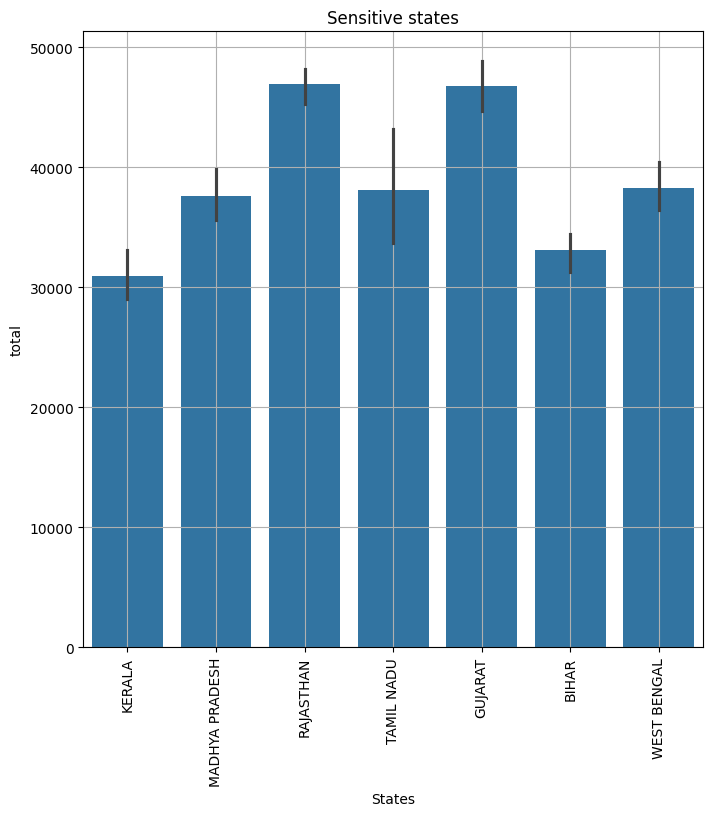

In [122]:
plt.figure(figsize=(8,8))
sns.barplot(x=sensitive_region['state/ut'],y=sensitive_region['total'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.title("Sensitive states")
plt.grid()
plt.show()

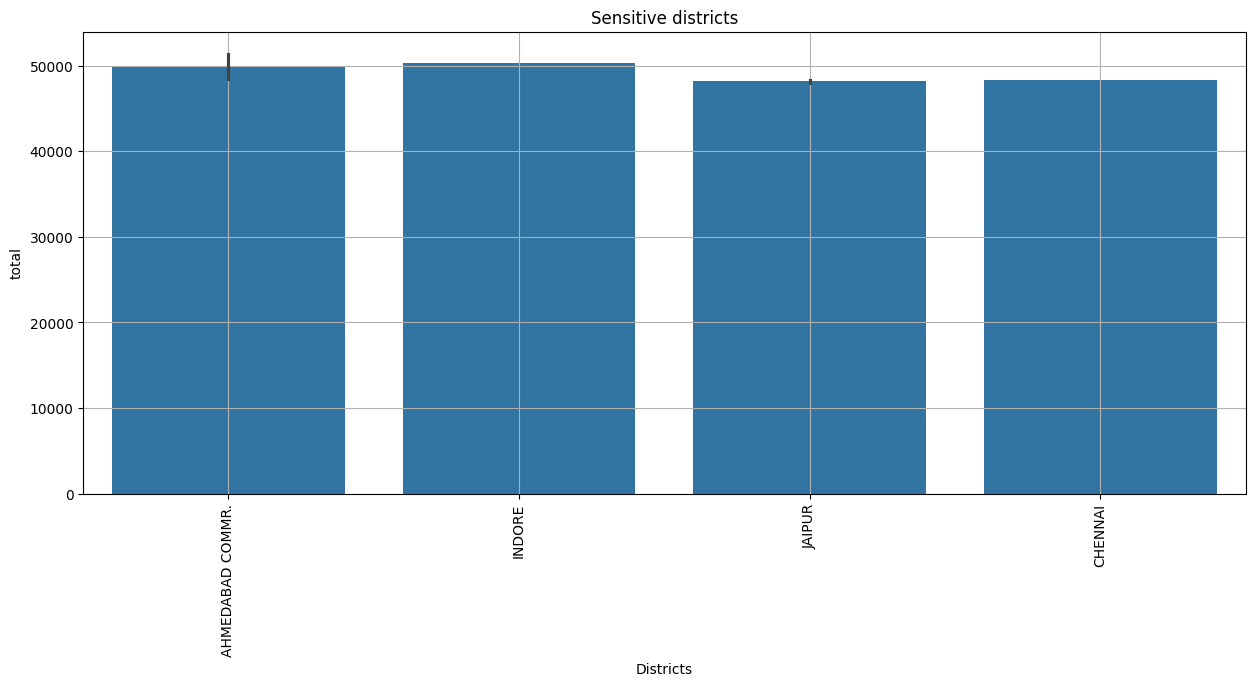

In [124]:
plt.figure(figsize=(15,6))
top_10 = sensitive_region.nlargest(10, 'total')
sns.barplot(x=top_10['district'], y=top_10['total'])
plt.xticks(rotation=90)
plt.xlabel("Districts")
plt.title("Sensitive districts")
plt.grid()
plt.show()

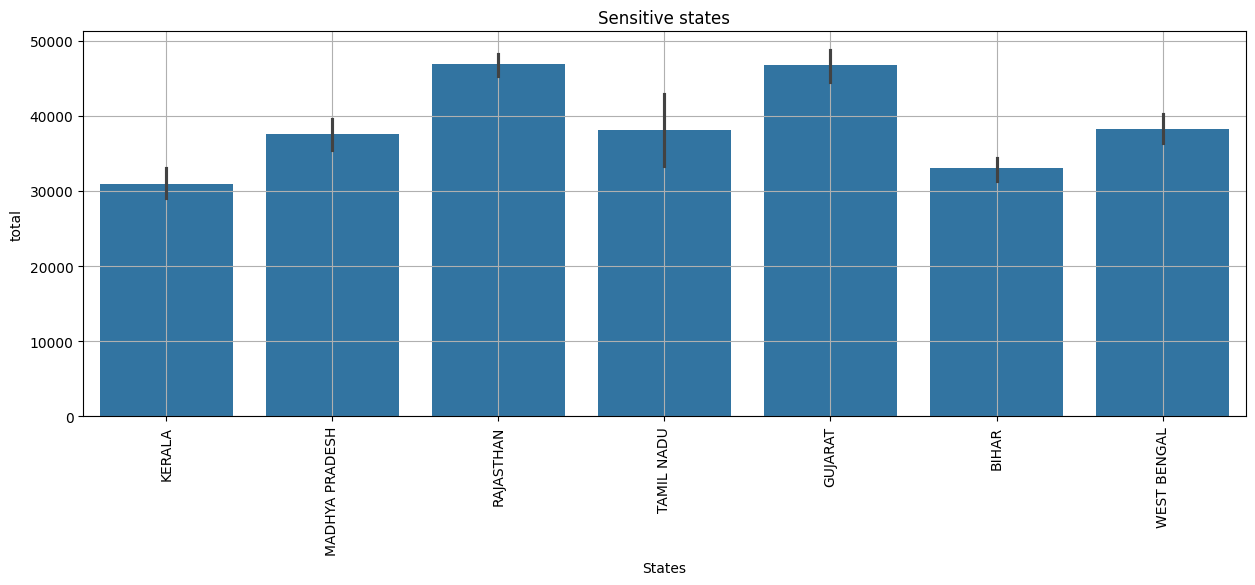

In [125]:
plt.figure(figsize=(15,5))
sns.barplot(x=sensitive_region['state/ut'],y=sensitive_region['total'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.title("Sensitive states")
plt.grid()
plt.show()

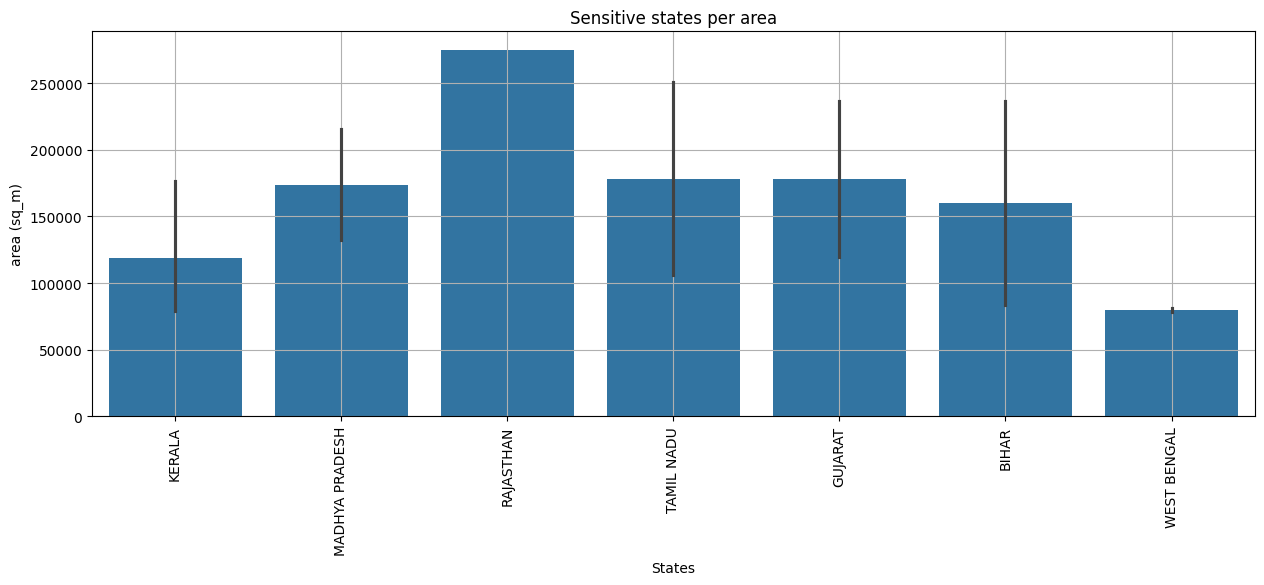

In [127]:
plt.figure(figsize=(15,5))
sns.barplot(x=sensitive_region['state/ut'],y=con_det['area (sq_m)'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.title("Sensitive states per area")
plt.grid()
plt.show()

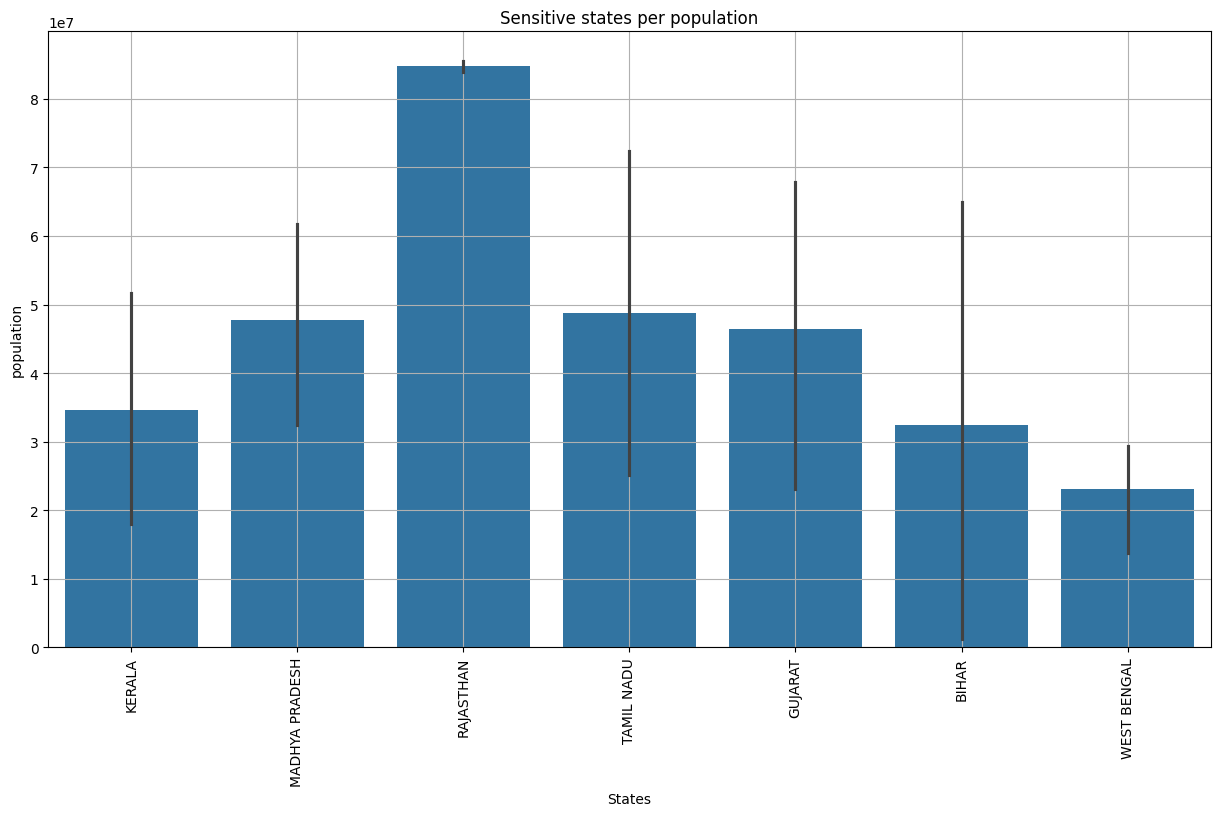

In [129]:
plt.figure(figsize=(15,8))
sns.barplot(x=sensitive_region['state/ut'],y=con_det['population'])
plt.xticks(rotation=90)
plt.xlabel("States")
plt.title("Sensitive states per population")
plt.grid()
plt.show();

"Analyse your clusters and prepare a report that explains all your observations.

Example -

What is impacting more crimes in sensitive areas.

What needs to be done to reduce crime.


In the bustling cities of Ahmedabad, Indore, Chennai and Jaipur, the pulse of life beats in sync with the city's heartbeat. But beneath the glittering façade lies a complex tapestry of crime, woven by myriad factors that intersect and collide. As I delve into the underbelly of these cities, let's explore the forces shaping their crime rates. **Jaipur** and **Indore**, like exploration magnets, draw people from all walks of life. Their rapid urbanization and soaring population densities create a fertile ground for criminal activity. As apartment towers scrape the sky, so do incidents of theft, robbery, and violence. The proximity of lives intertwines destinies—sometimes with sinister consequences.

*Solution*: Urban planners must wield their pens like swords, carving out safer neighborhoods. Improved infrastructure and vigilant policing can be the sentinels guarding our streets.

------
In the shadow of glittering skyscrapers, **income inequality** casts its long shadow. Poverty, like a hungry beast, drives desperate souls toward illicit means. When basic needs remain unmet, the line between right and wrong blurs. The haves and have-nots inhabit parallel universes, occasionally colliding in acts of desperation.

*Solution*: Social welfare programs, skill-building initiatives, and job opportunities can mend the torn fabric of society, stitching together a safer reality.


---------
Unemployment, that silent specter, haunts the streets. Idle hands, once hopeful, now clench into fists of frustration. The **high unemployment rates** in these cities create a tinderbox of emotions. Desperation pushes individuals toward the precipice of criminal behavior.

*Solution*: Vocational training, entrepreneurial dreams, and job creation—these are the keys to unlocking doors that lead away from despair.


--------

Cultural norms and gender biases choreograph the ballet of criminal behavior. Discrimination, like a venomous serpent, injects poison into society. Stereotypes fuel tensions, and the stage is set for tragedy.

*Solution*: Let us raise the curtain on awareness campaigns. Educate, enlighten, and rewrite the script of equality. Let diversity be our muse.

-------

Behind closed doors, **substance abuse** brews its toxic elixir. Drug trafficking, addiction, and violence swirl in this cauldron. The streets echo with whispered secrets, and lives unravel.

*Solution*: Rehabilitation programs must be our antidote. Law enforcement, armed with knowledge, must wage war against drug cartels.

--------

**Police presence**, or the lack thereof, shapes our reality. Corruption gnaws at the roots of trust. Justice delayed is justice denied, and criminals thrive in the gaps.

*Solution*: Invest in our guardians—the police. Equip them, train them, and let justice flow swiftly like a river.

-------

In the shadows, **gangs** weave their intricate webs. Extortion, smuggling, and violence—these are their currencies. Vulnerable areas become their playgrounds.

*Solution*: Unmask the puppeteers. Disrupt their networks. Intelligence-sharing among law enforcement agencies is our secret weapon.

------

The digital realm is a double-edged sword. **Cybercrime** lurks in the shadows, hacking identities and siphoning trust. Our screens are windows to both knowledge and peril.

*Solution*: Strengthen our digital armor. Educate the masses. Let cyber literacy be our shield.

-----

Communities hold the keys to safety. Trust, like a fragile butterfly, flutters between residents and law enforcement. Neighborhood watch programs and dialogue with local leaders—these are the stitches binding our social fabric.

*Solution*: Let us be the architects of our own security. Together, we can build safer havens.

-------
In the corridors of learning, hope flickers. **Education** illuminates minds, dispelling shadows. Youth, armed with knowledge, are less likely to dance with darkness.

*Solution*: Invest in schools, mentorship, and extracurricular pursuits. Let education be the compass guiding our youth away from the abyss.

*Remember*
--
Crime reduction is a symphony—a harmonious blend of government initiatives, civil society, and individual resolve. As I pen these words, let us weave a safer tapestry—one where shadows retreat, and hope takes root.
--

Most safe and unsafe districts.

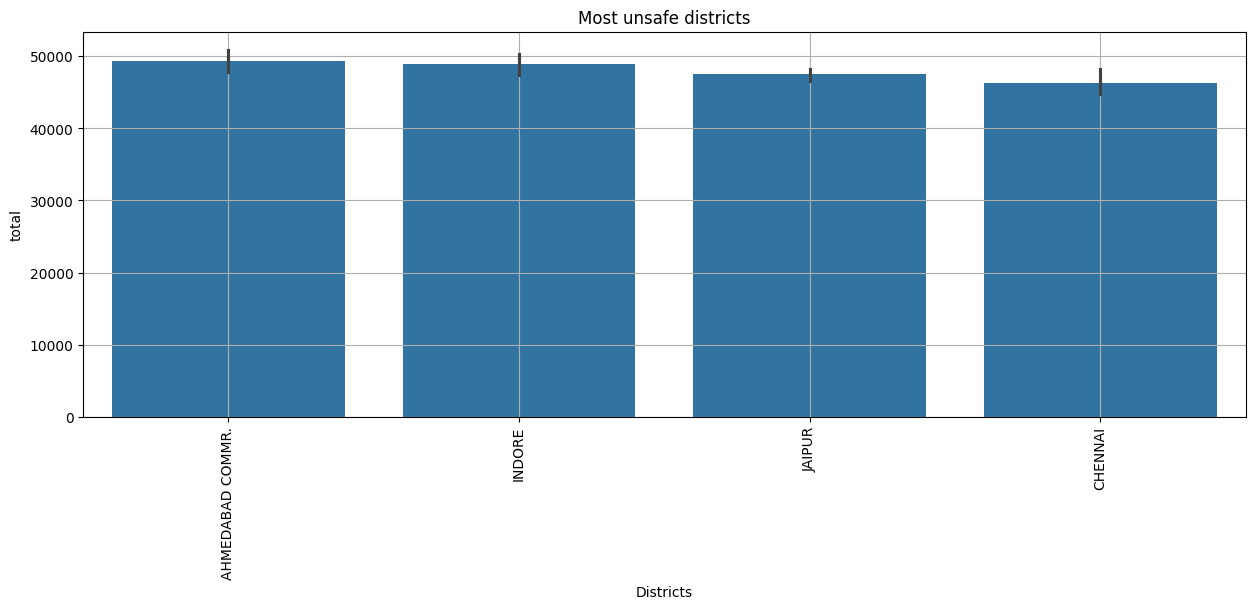

In [130]:
plt.figure(figsize=(15,5))
top_10 = sensitive_region.nlargest(15, 'total')
sns.barplot(x=top_10['district'], y=top_10['total'])
plt.xticks(rotation=90)
plt.xlabel("Districts")
plt.title("Most unsafe districts")
plt.grid()
plt.show()

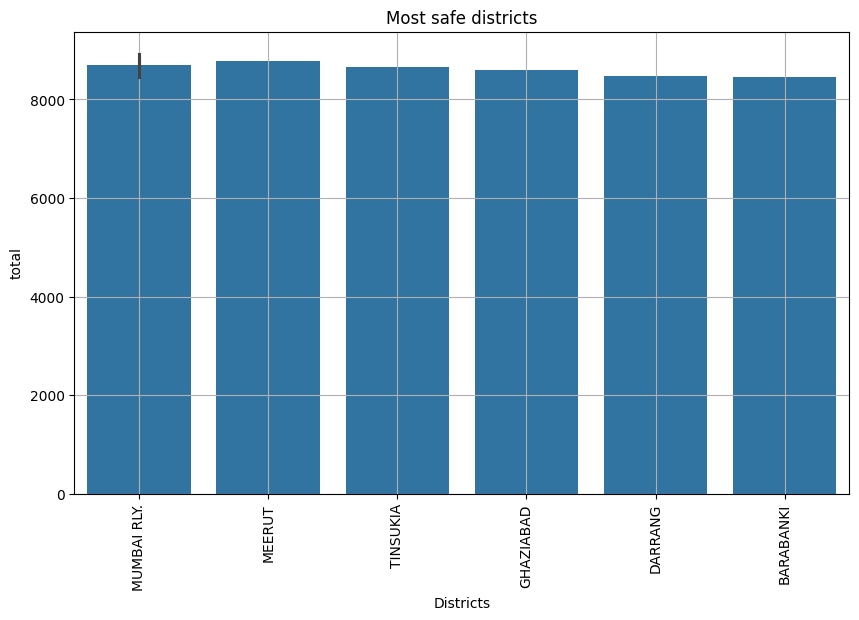

In [132]:
plt.figure(figsize=(10,6))
top_10 = peaceful_region.nlargest(10, 'total')
sns.barplot(x=top_10['district'], y=top_10['total'])
plt.xticks(rotation=90)
plt.xlabel("Districts")
plt.title("Most safe districts")
plt.grid()
plt.show()

**Unraveling Crime Patterns in India: A Data-Driven Journey**

Introduction
===
Crime, like an insidious shadow, permeates every society. In India, where vibrant cultures coexist amidst myriad challenges, understanding crime dynamics becomes crucial. My capstone project delved into this intricate web of criminal activities, aiming to extract meaningful insights from raw data. Armed with Python and an arsenal of unsupervised learning algorithms, I embarked on a journey to decipher patterns, identify hotspots, and unravel the underlying causes.
Data Collection and Preprocessing
===
The success of any data-driven project hinges on the quality of the data. For this project, I turned to the (Internal, government sites, some generic assumptions), a rich information pool of crime-related data. The dataset was comprehensive, spanning several years and covering various types of crimes, regions, and socio-economic factors. However, like any raw data, it was not without its flaws. Missing values, outliers, and inconsistencies were all part of the package, necessitating a thorough preprocessing.
With the help of MySQL Workbench and python, I cleaned the dataset, filled in missing values, and standardized the features. The result was a clean, ready-to-analyze dataset that served as my canvas for painting a picture of India’s crime landscape.
Unsupervised Learning: Clustering and Insights
===
K-Means Clustering
--
K-means clustering, a cornerstone of unsupervised learning, was my guide on this journey. By grouping similar regions based on their crime rates, I aimed to uncover hidden patterns. The results were insightful. Clusters formed, revealing regions of peace and tranquility, and others rife with criminal activity. The algorithm divided the regions into three main categories:
Sensitive Areas: These regions exhibited alarmingly high crime rates. Poverty, unemployment, and social unrest fuelled criminal behaviour.
Moderate Areas: Here, crime rates hovered around the national average. These regions faced challenges but maintained a semblance of order. Economic stability and community engagement played pivotal roles.
Peaceful Enclaves: These idyllic pockets boasted low crime rates. Affluent neighborhoods, effective policing, and community cohesion contributed to their tranquility.
Insights and Recommendations
==
Digging deeper, I explored the reasons behind the high crime rates in sensitive areas. Unemployment, lack of education, and inadequate law enforcement were common threads. Addressing these issues could help reduce crime.
In peaceful enclaves, community vigilance played a key role in maintaining order. Implementing neighbourhood watch programs, engaging youth, and running awareness campaigns could help replicate this success in other areas.
With these insights, law enforcement agencies could strategically allocate resources. Sensitive areas required targeted interventions, while community policing could benefit moderate regions.
Conclusion
==
My capstone project transcended code and algorithms. It was a voyage through India’s underbelly—a quest for understanding, empathy, and change. As I penned this write-up, I realized that data science isn’t just about numbers; it’s about transforming lives, one insight at a time.
________________________________________
In retrospect, my journey through crime analysis taught me that data, when wielded responsibly, can be a beacon of hope. As I sign off, I leave you with this thought: In the labyrinth of crime, data scientists are torchbearers, illuminating paths toward a safer, more just society.
